### **GitHub repo link:** https://github.com/dpc43/Data271Project

### By Heather Campbell and Dean Callahan


## **Introduction:**

California is well-known for its high cost of living. Over the last few decades, significant demographic and economic changes point to these costs becoming even higher than they were in the past, especially in relation to other states. For the first time in recent history, for instance, California had a declining population during the pandemic with many citing the increase in housing costs and the cost of living as their primary reasons for leaving (http://www.ppic.org). In addition to high cost of living, wage stagnation and income inequality are among other factors that may be exacerbating the higher costs of living (https://projects.calmatters.org/2018/digging-data-attainable-california-dream-today/).

To explore this issue in more detail, we will analyze U.S. Census data to see if there are any clear patterns, trends, or relationships between cost of living, income distribution, and demographics in California since the 1990's. The methods we plan to use to analyze the data include descriptive statistics, data visualization, identification of relationships and patterns, and transforming or creating features for further analysis, as needed. 

The analysis will help address this issue by creating a clearer picture of the long-term economic and demographic trends that may be contributing to California becoming an increasingly harder place to live. It may also help point to whether not these trends are likely to continue in the future. Knowing this information could help consumers of our analysis by highlighting specific factors that could be addressed to help prevent this situation from getting worse and to help move towards improving the quality of life in California both now and in the future.

## **Modules:**

These are the modules that will be used for this analysis and the reasons they are necessary:

- **Numpy:** to manipulate data and make calculations efficiently using multi-dimensional arrays
- **Pandas:** to clean, transform, and analyze large datasets using the speed and flexibility of Series and DataFrames
- **Matplotlib:** to enhance control of plot elements when creating data visualizations
- **Seaborn:** to create aesthetically pleasing and informative data visualizations
- **re:** To extract patterns and information from text and to clean column names using regular expression
- **warnings:** to filter out warning messages and provide a cleaner layout to the notebook
- **requests:** To import additional data through web scraping to get more information about census data
- **BeautifulSoup:** To improve the results of web scraping and to parse HTML content

In [1]:
# Import Python modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')
import requests
from bs4 import BeautifulSoup

## **Data Description**:

<u>**Source:**</u> 
All of the datasets are sourced from IPUMS (Integrated Public Use Microdata Series) USA, an organization that "collects, preserves and harmonizes U.S. census microdata and provides easy access to this data with enhanced documentation. Data includes decennial censuses from 1790 to 2010 and American Community Surveys (ACS) from 2000 to the present." 

Steven Ruggles, Sarah Flood, Matthew Sobek, Daniel Backman, Grace Cooper, Julia A. Rivera Drew, Stephanie Richards, Renae Rodgers, Jonathan Schroeder, and Kari C.W. Williams. IPUMS USA: Version 16.0 Minneapolis, MN: IPUMS, 2025. https://doi.org/10.18128/D010.V16.0

<u>**Original Purpose:**</u> For the purpose of this analysis, two types of surveys were chosen -- the American Community Survey (ACS) 1-year (for the years 2000, 2006, 2011, 2016, 2021, and 2023) and the 1% Metro Sample Survey (for the year 1990 only since there wasn't yet an ACS survey prior to 2000). The purpose of the ACS 1-year surveys are to provide "vital information on a yearly basis about our nation and its people. Information from the survey generates data that help inform how trillions of dollars in federal funds are distributed each year" (https://www.census.gov/programs-surveys/acs/about.html). For example, in addition to general demographic information like age, sex, and race traditionally gathered in the decennial (10-year) census, the ACS surveys sample the population to gather additional information about jobs and occupations, educational attainment, veterans, whether people own or rent their homes, and more. The 1% Metro Sample Survey was a precursor to the ACS surveys, but had a similar purpose and was chosen for this analysis to provide a broader range of data over a longer time span.

<u>**Sampling Methodology:**</u> Both the ACS 1-year surveys and 1% Metro Sample Survey were administered by US Census Bureau representatives, primarily through mail-in (and later internet) surveys, with telephone calls and/or in-person interviews used to follow-up with non-respondents. Even though the ACS 1-year surveys and 1% Metro Samply Survey are adiminstered similarly, there are some key differences in the sampling methodology. Specifically, the 1% Metro Survey is based on a 1-in-100 random sample of the US population selected from the decennial survey taken on a specific day (April 1st of that year). In contrast, the ACS 1-year survey is a random rolling sample of 1-in-100 US households taken throughout the year (beginning in 2005) and 1-in-750 US households (in 2000). For both survey types, the sample size is generally considered to be good for areas with populations of at least 65,000 or more (except for the ACS 1-year survey in 2000, in which no population smaller than the state level can be identified). More information on the survey samples can be found here: https://usa.ipums.org/usa/sampdesc.shtml.

<u>**Response Rate:**</u> While a response rate could not be found for the 1% Metro Survey in 1990, the overall response rate for the decennial survey in 1990 (from which data was gathered for the 1% Metro Survey) was around 67%. The response rate for the ACS 1-year survey generally ranges from 84.4% to 98%, except during the pandemic in 2020 when the response rate was 71.2% (https://www.census.gov/acs/www/methodology/sample-size-and-data-quality/response-rates/). The main difficulty when response rates are low is the estimates can be biased or inaccurate, and overall, not reflective of the true population. So, especially for years where the response rates are low, it's important to keep in my mind that it is possible for these discrepancies to show up in the data analysis.

<u>**Years:**</u> The goal of this analysis was to look at trends related to cost of living, income distribution, and demographics in California since the 1990's. While the 10 year gap between 1990 and the next survey year 2000 was not ideal, it was the only comparable data available for that timeframe, so data from the year 2000 was chosen next after 1990. The next years, 2006, 2011, 2016, and 2021, were all chosen in five-year increments (not including 2001 since it was so close to 2000) in a way that both captured before/after the housing crisis between 2007 and 2009, and that avoided the 2020 ACS 1-year survey, which had the lowest response rate ever for that survey during the pandemic. The last year 2023 was also chosen because it was the most recent year available in the dataset.

<u>**Variables:**</u> While it varies by the year the data were collected, there are approximately 90-95 key variables available in the original dataset (https://www.census.gov/programs-surveys/acs/guidance/subjects.html). For this data analysis, the following variables were imported:

| Variable Name | Description | Data Type |
| :-- | :-- | :-- |
| YEAR | The four-digit year when the household was enumerated or included in the census, the ACS, and the PRCS. This is a numeric variable that is measured in traditional calendar years. | int64 |
| SAMPLE | IPUMS sample identifier. Identifies the IPUMS sample from which the case is drawn. Each sample receives a unique 6-digit code. The codes are structured as follows: The first four digits are the year of the census/survey. The next two digits identify the sample within the year. This is a categorical variable that is represented numerically.| int64 |
| SERIAL | Household serial number. An identifying number unique to each household record in a given sample. All person records are assigned the same serial number as the household record that they follow. This is a uniqiue categorial variable for each household that is represented numerically. | float64 |
| CBSERIAL | The unique, original identification number assigned to each household record in a given sample by the Census Bureau. All person records are assigned the same serial number as the household record that they follow.  This is a uniqiue categorial variable that is represented numerically. | int64 |
| HHWT | Household weight. Indicates how many households in the U.S. population are represented by a given household in an IPUMS sample. This is a discrete numeric variable that represents the number of households.| int64 |
| CLUSTER | Household cluster for variance estimation designed for use with STRATA in Taylor series linear approximation for correction of complex sample design characteristics. This is a numeric variable. | float64 |
| STATEFIP | State (FIPS code). Reports the state in which the household was located, using the Federal Information Processing Standards (FIPS) coding scheme, which orders the states alphabetically. This is a categorical variable that is represented numerically. | int64 |
| COUNTYFIP | County (FIPS code, identifiable counties only). Identifies the county where the household was enumerated, using the Federal Information Processing Standard (FIPS) coding scheme. This is a categorical variable that is represented numerically. | int64 |
| STRATA | Household strata for variance estimation. Designed for use with CLUSTER in Taylor series linear approximation for correction of complex sample design characteristics. This is a discrete numeric variable. | int64 |
| GQ | Group quarters status. GQ classifies all housing units as falling into one of three main categories: households, group quarters, or vacant units. This is a categorical variable that is represented numerically.| int64 |
| OWNERSHP | Ownership of dwelling. Indicates whether the housing unit was rented or owned by its inhabitants. Housing units acquired with a mortgage or other lending arrangement(s) are classified as "owned," even if repayment was not yet completed. This is a categorical variable that is represented numerically. | int64 |
| OWNERSHPD | Ownership of dwelling (detailed version). Indicates whether housing unit is owned or being bought, owned free and clear, owned with mortgage or loan, rented, no cash rent, and/or with cash rent. This is a categorical variable that is represented numerically. | int64 |
| MORTGAGE | Mortgage status. Indicates whether an owner-occupied housing unit was owned free and clear or was encumbered by a mortgage, loan, or other type of debt. This is a categorical variable that is represented numerically.| int64 |
| PROPINSR | Annual property insurance cost (fire, hazard, flood). This is a numeric variable. | int64 |
| RENT | Monthly contract rent expressed in US dollars. This is a numeric variable. | int64 |
| COSTELEC | Annual electricity costs in US dollars. This is a numeric variable. | int64 |
| COSTGAS | Annual gas costs in US dollars. This is a numeric variable. | int64 |
| HHINCOME | Total household income in US dollars. This is a numeric variable.| int64 |
| VALUEH | Value of housing units in US dollars. This is a numeric variable. | int64 |
| COUPLETYPE | Householder couple type. Reports type of relationship the householder shares with their significant other, including both married and unmarried partners in same-sex and opposite-sex relationships. This is a categorical variable that is represented numerically. | float64 |
| NFAMS | Number of families in household. A "family" is any group of persons related by blood, adoption, or marriage. An unrelated individual is considered a separate family. Thus, a household consisting of a widow and her servant contains two families; a household consisting of a large, multiple-generation extended family with no boarders, lodgers, or servants counts as a single family. This is a discrete numeric variable. | int64 |
| PERNUM | Person number in sample unit. This is an assigned number to all persons within each household assigned by the order in which they appear on the original census or survey form. This is a discrete numeric variable. | int64 |
| PERWT | Person weight. Indicates how many persons in the U.S. population are represented by a given person in an IPUMS sample. This is a discrete numeric variable that represents the number of people. | int64 |
| SEX | Reports whether the person was male or female.  This is a categorical variable with 1 representing males and 2 representing females. | int64 |
| AGE | Age. This is a discrete numeric variable representing the person's age in years. | int64 |
| MARST | Gives each persons current marital status. This is a categorical variable. | int64 |
| RACE | Race (broad categories). This is a categorical variable. | int64 |
| RACED | Race (detailed categories). This is a categorical variable. | int64 |
| EDUC | Educational attainment (broad categories). Measured by the highest year of school or degree completed. This is a categorical variable. | int64 |
| EDUCD | Educational attainment (detailed categories). Measured by the highest year of school or degree completed. This is a categorical variable. | int64 |
| EMPSTAT | Employment status. Indicates whether the respondent was a part of the labor force -- working or seeking work -- and, if so, whether the person was currently unemployed. This is a categorical variable. | int64 |
| EMPSTATD | Employment status (detailed version). Indicates whether the respondent was a part of the labor force -- working or seeking work -- and, if so, whether the person was currently unemployed and why. This is a categorical variable. | int64 |
| OCC | Occupation. Reports the person's primary occupation, coded into a contemporary census classification scheme. This is a categorical variable that is represented numerically. | int64 |
| IND | Industry. Reports the type of industry in which the person performed an occupation. In census usage, "industry" currently refers to work setting and economic sector, as opposed to the worker's specific technical function, or "occupation". This is a categorical variable that is represented numerically. | int64 |
| INCTOT | Total personal income, including each respondent's total pre-tax personal income or losses from all sources for the previous year. This is a numeric variable measured in US dollars. | int64 |
| FTOTINC | Total family income, including the total pre-tax money income earned by one's family (as defined by FAMUNIT) from all sources for the previous year. This is a numeric variable measured in US dollars.| int64 |
| POVERTY | Poverty status. Reports the total annual income of each person's family expressed as a percentage of their family's poverty threshold, which is determined by the family's size, number of children, and age of the householder. POVERTY assigns all members of each family-not each household-the same value. This is a numeric variable. | int64 |

<u>**Missing Data:**</u> While missing values are an inherant part of collecting survey data, the US Census Bureau imputes data with a series of complex models. More information here: https://www.census.gov/programs-surveys/sipp/methodology/data-editing-and-imputation.html






## **Import/Prepare Data:**

One dataset was imported for each of the chosen survey years, including the American Community Survey (ACS) 1-year (for the years 2000, 2006, 2011, 2016, 2021, and 2023) and the 1% Metro Sample Survey (for the year 1990 only since there wasn't yet an ACS survey prior to 2000). After importing, the following steps were taken to inspect and clean each dataset:

1. Check the number of rows and columns
2. Check for missing values
3. Check for duplicate values
4. Check the data type of each column and convert them to more appropriate ones as needed
5. Clean up the columns names by applying snake case format and rename some columns to make them more clear
6. Add the cleaned dataframe to the directory to make a combined dataframe of all the datasets for analysis purposes

### Import 1990 1% Metro Sample Survey:

In [280]:
cali_1990_Metro1 = pd.read_csv('CA_Census_1990_Metro1.csv')
cali_1990_Metro1.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,COUNTYFIP,STRATA,GQ,...,RACED,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC,IND,INCTOT,FTOTINC,POVERTY
0,1990,199002,46452,NaN,52,1.990000e+12,6,0,57,1,...,700,0,2,3,30,0,0,3984,3984,53
1,1990,199002,46452,NaN,52,1.990000e+12,6,0,57,1,...,326,4,40,3,30,0,0,0,3984,53
2,1990,199002,46453,NaN,91,1.990000e+12,6,0,44,1,...,100,2,20,1,10,479,10,860,860,13
3,1990,199002,46454,NaN,117,1.990000e+12,6,0,53,1,...,100,3,30,3,30,0,0,13535,16929,226
4,1990,199002,46454,NaN,117,1.990000e+12,6,0,53,1,...,100,5,50,3,30,0,0,3394,16929,226


**Check the number of rows and columns:**

In [3]:
cali_1990_Metro1.shape

(290968, 37)

**Check for missing values:**

In [4]:
cali_1990_Metro1.isna().sum()[cali_1990_Metro1.isna().sum() > 0]

CBSERIAL      290968
COUPLETYPE    290968
dtype: int64

**Check for duplicate values:**

In [290]:
cali_1990_Metro1.duplicated().sum()

np.int64(0)

**Inspect the dataframe columns and than convert any data types that don't make logical sense:**

Data types are already appropriate, so no changes are necessary.

In [6]:
cali_1990_Metro1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290968 entries, 0 to 290967
Data columns (total 37 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   YEAR        290968 non-null  int64  
 1   SAMPLE      290968 non-null  int64  
 2   SERIAL      290968 non-null  int64  
 3   CBSERIAL    0 non-null       float64
 4   HHWT        290968 non-null  int64  
 5   CLUSTER     290968 non-null  float64
 6   STATEFIP    290968 non-null  int64  
 7   COUNTYFIP   290968 non-null  int64  
 8   STRATA      290968 non-null  int64  
 9   GQ          290968 non-null  int64  
 10  OWNERSHP    290968 non-null  int64  
 11  OWNERSHPD   290968 non-null  int64  
 12  MORTGAGE    290968 non-null  int64  
 13  PROPINSR    290968 non-null  int64  
 14  RENT        290968 non-null  int64  
 15  COSTELEC    290968 non-null  int64  
 16  COSTGAS     290968 non-null  int64  
 17  HHINCOME    290968 non-null  int64  
 18  VALUEH      290968 non-null  int64  
 19  CO

**Clean up the columns names by applying snake case format and renaming some columns to make them clearer:**

In [288]:
cali_1990_Metro1.columns=cali_1990_Metro1.columns.str.lower()
cali_1990_Metro1=cali_1990_Metro1.rename(columns={
    'hhwt':'hh_wt',
    'statefip':'state_fip',
    'county_fip':'county_fip',
    'gq':'group_quarters',
    'propinsr':'prop_insr',
    'costelec':'cost_elec',
    'costgas':'cost_gas',
    'hhincome':'hh_income',
    'valueh':'house_val',
    'nfams':'family_num',
    'hhwt':'hh_wt',
    'pernum':'person_num',
    'perwt':'person_wt',
    'empstat':'emp_stat',
    'empstatd':'empl_statd'
})
cali_1990_Metro1.columns

Index(['year', 'sample', 'serial', 'cbserial', 'hh_wt', 'cluster', 'state_fip',
       'countyfip', 'strata', 'group_quarters', 'ownershp', 'ownershpd',
       'mortgage', 'prop_insr', 'rent', 'cost_elec', 'cost_gas', 'hh_income',
       'house_val', 'coupletype', 'family_num', 'person_num', 'person_wt',
       'sex', 'age', 'marst', 'race', 'raced', 'educ', 'educd', 'emp_stat',
       'empl_statd', 'occ', 'ind', 'inctot', 'ftotinc', 'poverty'],
      dtype='object')

**Add the cleaned file to the directory so we can make a combined dataframe for analysis purposes:**

In [289]:
cali_1990_Metro1.to_csv('Cleaned_CA_Census_1990.csv', index=False)

## Data cleaning/preparation steps repeated for each of the subsequent datasets

### Import ACS 2000 1-Year Data:

In [9]:
cali_2000_ACS1 = pd.read_csv('CA_Census_2000_ACS1.csv')
cali_2000_ACS1.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,COUNTYFIP,STRATA,GQ,...,RACED,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC,IND,INCTOT,FTOTINC,POVERTY
0,2000,200004,7,NaN,600,2.000000e+12,6,NaN,6,1,...,100,10,101,1,10,330,819,52000,177000,501
1,2000,200004,7,NaN,600,2.000000e+12,6,NaN,6,1,...,100,11,114,1,10,260,657,125000,177000,501
2,2000,200004,21,NaN,1800,2.000000e+12,6,NaN,6,1,...,700,6,62,1,10,524,639,6000,6000,44
3,2000,200004,21,NaN,1800,2.000000e+12,6,NaN,6,1,...,700,0,1,0,0,0,0,9999999,6000,44
4,2000,200004,21,NaN,1800,2.000000e+12,6,NaN,6,1,...,700,1,10,0,0,0,0,9999999,6000,44


**Check the number of rows and columns:**

In [10]:
cali_2000_ACS1.shape

(38143, 37)

**Check for missing values:**

In [11]:
cali_2000_ACS1.isna().sum()[cali_2000_ACS1.isna().sum() > 0]

CBSERIAL      38143
COUNTYFIP     38143
COUPLETYPE    38143
dtype: int64

**Check for duplicate values:**

In [12]:
cali_2000_ACS1.duplicated().sum()

np.int64(0)

**Inspect the dataframe columns and than convert any data types that don't make logical sense:**

Data types are already appropriate, so no changes are necessary.

In [13]:
cali_2000_ACS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38143 entries, 0 to 38142
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YEAR        38143 non-null  int64  
 1   SAMPLE      38143 non-null  int64  
 2   SERIAL      38143 non-null  int64  
 3   CBSERIAL    0 non-null      float64
 4   HHWT        38143 non-null  int64  
 5   CLUSTER     38143 non-null  float64
 6   STATEFIP    38143 non-null  int64  
 7   COUNTYFIP   0 non-null      float64
 8   STRATA      38143 non-null  int64  
 9   GQ          38143 non-null  int64  
 10  OWNERSHP    38143 non-null  int64  
 11  OWNERSHPD   38143 non-null  int64  
 12  MORTGAGE    38143 non-null  int64  
 13  PROPINSR    38143 non-null  int64  
 14  RENT        38143 non-null  int64  
 15  COSTELEC    38143 non-null  int64  
 16  COSTGAS     38143 non-null  int64  
 17  HHINCOME    38143 non-null  int64  
 18  VALUEH      38143 non-null  int64  
 19  COUPLETYPE  0 non-null   

**Clean up the columns names by applying snake case format and renaming some columns to make them clearer:**

In [14]:
cali_2000_ACS1.columns=cali_2000_ACS1.columns.str.lower()
cali_2000_ACS1=cali_2000_ACS1.rename(columns={
    'hhwt':'hh_wt',
    'statefip':'state_fip',
    'county_fip':'county_fip',
    'gq':'group_quarters',
    'propinsr':'prop_insr',
    'costelec':'cost_elec',
    'costgas':'cost_gas',
    'hhincome':'hh_income',
    'valueh':'house_val',
    'nfams':'family_num',
    'hhwt':'hh_wt',
    'pernum':'person_num',
    'perwt':'person_wt',
    'empstat':'emp_stat',
    'empstatd':'empl_statd'  
})
cali_2000_ACS1.columns

Index(['year', 'sample', 'serial', 'cbserial', 'hh_wt', 'cluster', 'state_fip',
       'countyfip', 'strata', 'group_quarters', 'ownershp', 'ownershpd',
       'mortgage', 'prop_insr', 'rent', 'cost_elec', 'cost_gas', 'hh_income',
       'house_val', 'coupletype', 'family_num', 'person_num', 'person_wt',
       'sex', 'age', 'marst', 'race', 'raced', 'educ', 'educd', 'emp_stat',
       'empl_statd', 'occ', 'ind', 'inctot', 'ftotinc', 'poverty'],
      dtype='object')

**Add the cleaned file to the directory so we can make a combined dataframe for analysis purposes:**

In [15]:
cali_2000_ACS1.to_csv('Cleaned_CA_Census_2000.csv', index=False)

### Import ACS 2006 1-Year Data:

In [16]:
cali_2006_ACS1 = pd.read_csv('CA_Census_2006_ACS1.csv')
cali_2006_ACS1.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,COUNTYFIP,STRATA,GQ,...,RACED,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC,IND,INCTOT,FTOTINC,POVERTY
0,2006,200601,65922,1,113,2.006000e+12,6,85,271006,1,...,100,6,62,2,20,9120,6180,41500,45700,381
1,2006,200601,65922,1,113,2.006000e+12,6,85,271006,1,...,100,2,21,3,30,5700,7690,4200,45700,381
2,2006,200601,65923,2,65,2.006000e+12,6,37,541606,1,...,100,7,71,1,10,5700,7590,14880,23880,119
3,2006,200601,65923,2,65,2.006000e+12,6,37,541606,1,...,100,1,10,0,0,0,0,9999999,23880,119
4,2006,200601,65923,2,65,2.006000e+12,6,37,541606,1,...,100,1,10,0,0,0,0,9999999,23880,119


**Check the number of rows and columns:**

In [17]:
cali_2006_ACS1.shape

(345723, 37)

**Check for missing values:**

In [18]:
cali_2006_ACS1.isna().sum()[cali_2006_ACS1.isna().sum() > 0]

COUPLETYPE    345723
dtype: int64

**Check for duplicate values:**

In [19]:
cali_2006_ACS1.duplicated().sum()

np.int64(0)

**Inspect the dataframe columns and than convert any data types that don't make logical sense:**

Data types are already appropriate, so no changes are necessary.

In [20]:
cali_2006_ACS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345723 entries, 0 to 345722
Data columns (total 37 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   YEAR        345723 non-null  int64  
 1   SAMPLE      345723 non-null  int64  
 2   SERIAL      345723 non-null  int64  
 3   CBSERIAL    345723 non-null  int64  
 4   HHWT        345723 non-null  int64  
 5   CLUSTER     345723 non-null  float64
 6   STATEFIP    345723 non-null  int64  
 7   COUNTYFIP   345723 non-null  int64  
 8   STRATA      345723 non-null  int64  
 9   GQ          345723 non-null  int64  
 10  OWNERSHP    345723 non-null  int64  
 11  OWNERSHPD   345723 non-null  int64  
 12  MORTGAGE    345723 non-null  int64  
 13  PROPINSR    345723 non-null  int64  
 14  RENT        345723 non-null  int64  
 15  COSTELEC    345723 non-null  int64  
 16  COSTGAS     345723 non-null  int64  
 17  HHINCOME    345723 non-null  int64  
 18  VALUEH      345723 non-null  int64  
 19  CO

**Clean up the columns names by applying snake case format and renaming some columns to make them clearer:**

In [21]:
cali_2006_ACS1.columns=cali_2006_ACS1.columns.str.lower()
cali_2006_ACS1=cali_2006_ACS1.rename(columns={
    'hhwt':'hh_wt',
    'statefip':'state_fip',
    'county_fip':'county_fip',
    'gq':'group_quarters',
    'propinsr':'prop_insr',
    'costelec':'cost_elec',
    'costgas':'cost_gas',
    'hhincome':'hh_income',
    'valueh':'house_val',
    'nfams':'family_num',
    'hhwt':'hh_wt',
    'pernum':'person_num',
    'perwt':'person_wt',
    'empstat':'emp_stat',
    'empstatd':'empl_statd'  
})
cali_2006_ACS1.columns

Index(['year', 'sample', 'serial', 'cbserial', 'hh_wt', 'cluster', 'state_fip',
       'countyfip', 'strata', 'group_quarters', 'ownershp', 'ownershpd',
       'mortgage', 'prop_insr', 'rent', 'cost_elec', 'cost_gas', 'hh_income',
       'house_val', 'coupletype', 'family_num', 'person_num', 'person_wt',
       'sex', 'age', 'marst', 'race', 'raced', 'educ', 'educd', 'emp_stat',
       'empl_statd', 'occ', 'ind', 'inctot', 'ftotinc', 'poverty'],
      dtype='object')

**Add the cleaned file to the directory so we can make a combined dataframe for analysis purposes:**

In [22]:
cali_2006_ACS1.to_csv('Cleaned_CA_Census_2006.csv', index=False)

### Import ACS 2011 1-Year Data:

In [23]:
cali_2011_ACS1 = pd.read_csv('CA_Census_2011_ACS1.csv')
cali_2011_ACS1.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,COUNTYFIP,STRATA,GQ,...,RACED,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC,IND,INCTOT,FTOTINC,POVERTY
0,2011,201101,66400,9,55.0,2011000664001,6,0,80006,1,...,700,6,63,1,10,3645,8090,24000,74000,500
1,2011,201101,66400,9,55.0,2011000664001,6,0,80006,1,...,700,6,65,1,10,9130,4580,50000,74000,500
2,2011,201101,66401,13,36.0,2011000664011,6,37,611306,1,...,700,6,65,1,10,5700,6990,29300,29300,255
3,2011,201101,66402,33,54.0,2011000664021,6,0,80006,1,...,610,6,61,1,10,4720,4980,12600,12600,85
4,2011,201101,66402,33,54.0,2011000664021,6,0,80006,1,...,100,5,50,3,30,0,0,0,12600,85


**Check the number of rows and columns:**

In [24]:
cali_2011_ACS1.shape

(368809, 36)

**Check for missing values:**

In [25]:
cali_2011_ACS1.isna().sum()[cali_2011_ACS1.isna().sum() > 0]

Series([], dtype: int64)

**Check for duplicate values:**

In [26]:
cali_2011_ACS1.duplicated().sum()

np.int64(0)

**Inspect the dataframe columns and than convert any data types that don't make logical sense:**

Data types are already appropriate, so no changes are necessary.

In [27]:
cali_2011_ACS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368809 entries, 0 to 368808
Data columns (total 36 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   YEAR       368809 non-null  int64  
 1   SAMPLE     368809 non-null  int64  
 2   SERIAL     368809 non-null  int64  
 3   CBSERIAL   368809 non-null  int64  
 4   HHWT       368809 non-null  float64
 5   CLUSTER    368809 non-null  int64  
 6   STATEFIP   368809 non-null  int64  
 7   COUNTYFIP  368809 non-null  int64  
 8   STRATA     368809 non-null  int64  
 9   GQ         368809 non-null  int64  
 10  OWNERSHP   368809 non-null  int64  
 11  OWNERSHPD  368809 non-null  int64  
 12  MORTGAGE   368809 non-null  int64  
 13  PROPINSR   368809 non-null  int64  
 14  RENT       368809 non-null  int64  
 15  COSTELEC   368809 non-null  int64  
 16  COSTGAS    368809 non-null  int64  
 17  HHINCOME   368809 non-null  int64  
 18  VALUEH     368809 non-null  int64  
 19  NFAMS      368809 non-n

**Clean up the columns names by applying snake case format and renaming some columns to make them clearer:**

In [28]:
cali_2011_ACS1.columns=cali_2011_ACS1.columns.str.lower()
cali_2011_ACS1=cali_2011_ACS1.rename(columns={
    'hhwt':'hh_wt',
    'statefip':'state_fip',
    'county_fip':'county_fip',
    'gq':'group_quarters',
    'propinsr':'prop_insr',
    'costelec':'cost_elec',
    'costgas':'cost_gas',
    'hhincome':'hh_income',
    'valueh':'house_val',
    'nfams':'family_num',
    'hhwt':'hh_wt',
    'pernum':'person_num',
    'perwt':'person_wt',
    'empstat':'emp_stat',
    'empstatd':'empl_statd'  
})
cali_2011_ACS1.columns

Index(['year', 'sample', 'serial', 'cbserial', 'hh_wt', 'cluster', 'state_fip',
       'countyfip', 'strata', 'group_quarters', 'ownershp', 'ownershpd',
       'mortgage', 'prop_insr', 'rent', 'cost_elec', 'cost_gas', 'hh_income',
       'house_val', 'family_num', 'person_num', 'person_wt', 'sex', 'age',
       'marst', 'race', 'raced', 'educ', 'educd', 'emp_stat', 'empl_statd',
       'occ', 'ind', 'inctot', 'ftotinc', 'poverty'],
      dtype='object')

**Add the cleaned file to the directory so we can make a combined dataframe for analysis purposes:**

In [29]:
cali_2011_ACS1.to_csv('Cleaned_CA_Census_2011.csv', index=False)

### Import ACS 2016 1-Year Data:

In [30]:
cali_2016_ACS1 = pd.read_csv('CA_Census_2016_ACS1.csv')
cali_2016_ACS1.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,COUNTYFIP,STRATA,GQ,...,RACED,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC,IND,INCTOT,FTOTINC,POVERTY
0,2016,201601,67752,33,102,2.016000e+12,6,107,1070206,1,...,976,8,81,3,30,0,0,20000,54000,375
1,2016,201601,67752,33,102,2.016000e+12,6,107,1070206,1,...,865,6,65,3,30,0,0,34000,54000,375
2,2016,201601,67753,36,122,2.016000e+12,6,65,651406,1,...,801,7,71,1,10,4760,5080,14300,41500,223
3,2016,201601,67753,36,122,2.016000e+12,6,65,651406,1,...,100,6,63,1,10,4760,4770,15700,41500,223
4,2016,201601,67753,36,122,2.016000e+12,6,65,651406,1,...,801,6,65,2,20,4760,5080,11500,41500,223


**Check the number of rows and columns:**

In [31]:
cali_2016_ACS1.shape

(376035, 36)

**Check for missing values:**

In [32]:
cali_2016_ACS1.isna().sum()[cali_2016_ACS1.isna().sum() > 0]

Series([], dtype: int64)

**Check for duplicate values:**

In [33]:
cali_2016_ACS1.duplicated().sum()

np.int64(0)

**Inspect the dataframe columns and than convert any data types that don't make logical sense:**

Data types are already appropriate, so no changes are necessary.

In [34]:
cali_2016_ACS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376035 entries, 0 to 376034
Data columns (total 36 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   YEAR       376035 non-null  int64  
 1   SAMPLE     376035 non-null  int64  
 2   SERIAL     376035 non-null  int64  
 3   CBSERIAL   376035 non-null  int64  
 4   HHWT       376035 non-null  int64  
 5   CLUSTER    376035 non-null  float64
 6   STATEFIP   376035 non-null  int64  
 7   COUNTYFIP  376035 non-null  int64  
 8   STRATA     376035 non-null  int64  
 9   GQ         376035 non-null  int64  
 10  OWNERSHP   376035 non-null  int64  
 11  OWNERSHPD  376035 non-null  int64  
 12  MORTGAGE   376035 non-null  int64  
 13  PROPINSR   376035 non-null  int64  
 14  RENT       376035 non-null  int64  
 15  COSTELEC   376035 non-null  int64  
 16  COSTGAS    376035 non-null  int64  
 17  HHINCOME   376035 non-null  int64  
 18  VALUEH     376035 non-null  int64  
 19  NFAMS      376035 non-n

**Clean up the columns names by applying snake case format and renaming some columns to make them clearer:**

In [35]:
cali_2016_ACS1.columns=cali_2016_ACS1.columns.str.lower()
cali_2016_ACS1=cali_2016_ACS1.rename(columns={
    'hhwt':'hh_wt',
    'statefip':'state_fip',
    'county_fip':'county_fip',
    'gq':'group_quarters',
    'propinsr':'prop_insr',
    'costelec':'cost_elec',
    'costgas':'cost_gas',
    'hhincome':'hh_income',
    'valueh':'house_val',
    'nfams':'family_num',
    'hhwt':'hh_wt',
    'pernum':'person_num',
    'perwt':'person_wt',
    'empstat':'emp_stat',
    'empstatd':'empl_statd'  
})
cali_2016_ACS1.columns

Index(['year', 'sample', 'serial', 'cbserial', 'hh_wt', 'cluster', 'state_fip',
       'countyfip', 'strata', 'group_quarters', 'ownershp', 'ownershpd',
       'mortgage', 'prop_insr', 'rent', 'cost_elec', 'cost_gas', 'hh_income',
       'house_val', 'family_num', 'person_num', 'person_wt', 'sex', 'age',
       'marst', 'race', 'raced', 'educ', 'educd', 'emp_stat', 'empl_statd',
       'occ', 'ind', 'inctot', 'ftotinc', 'poverty'],
      dtype='object')

**Add the cleaned file to the directory so we can make a combined dataframe for analysis purposes:**

In [36]:
cali_2016_ACS1.to_csv('Cleaned_CA_Census_2016.csv', index=False)

### Import ACS 2021 1-Year Data:

In [3]:
cali_2021_ACS1 = pd.read_csv('CA_Census_2021_ACS1.csv')
cali_2021_ACS1.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,COUNTYFIP,STRATA,GQ,...,RACED,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC,IND,INCTOT,FTOTINC,POVERTY
0,2021,202101,71725,2.021010e+12,177,2.021000e+12,6,37,374106,4,...,100,0,2,3,30,0,0,15000,9999999,0
1,2021,202101,71726,2.021010e+12,14,2.021000e+12,6,111,1110206,3,...,100,10,101,3,30,0,0,14800,9999999,0
2,2021,202101,71727,2.021010e+12,14,2.021000e+12,6,67,671206,4,...,100,6,63,3,30,0,0,11300,9999999,0
3,2021,202101,71728,2.021010e+12,19,2.021000e+12,6,55,550006,4,...,100,10,101,3,30,2633,9570,14000,9999999,0
4,2021,202101,71729,2.021010e+12,17,2.021000e+12,6,37,373506,4,...,100,8,81,2,20,4760,5170,7600,9999999,0


**Check the number of rows and columns:**

In [38]:
cali_2021_ACS1.shape

(386061, 36)

**Check for missing values:**

In [39]:
cali_2021_ACS1.isna().sum()[cali_2021_ACS1.isna().sum() > 0]

Series([], dtype: int64)

**Check for duplicate values:**

In [40]:
cali_2021_ACS1.duplicated().sum()

np.int64(0)

**Inspect the dataframe columns and than convert any data types that don't make logical sense:**

Data types are already appropriate, so no changes are necessary.

In [41]:
cali_2021_ACS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386061 entries, 0 to 386060
Data columns (total 36 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   YEAR       386061 non-null  int64  
 1   SAMPLE     386061 non-null  int64  
 2   SERIAL     386061 non-null  int64  
 3   CBSERIAL   386061 non-null  float64
 4   HHWT       386061 non-null  int64  
 5   CLUSTER    386061 non-null  float64
 6   STATEFIP   386061 non-null  int64  
 7   COUNTYFIP  386061 non-null  int64  
 8   STRATA     386061 non-null  int64  
 9   GQ         386061 non-null  int64  
 10  OWNERSHP   386061 non-null  int64  
 11  OWNERSHPD  386061 non-null  int64  
 12  MORTGAGE   386061 non-null  int64  
 13  PROPINSR   386061 non-null  int64  
 14  RENT       386061 non-null  int64  
 15  COSTELEC   386061 non-null  int64  
 16  COSTGAS    386061 non-null  int64  
 17  HHINCOME   386061 non-null  int64  
 18  VALUEH     386061 non-null  int64  
 19  NFAMS      386061 non-n

**Clean up the columns names by applying snake case format and renaming some columns to make them clearer:**

In [42]:
cali_2021_ACS1.columns=cali_2021_ACS1.columns.str.lower()
cali_2021_ACS1=cali_2021_ACS1.rename(columns={
    'hhwt':'hh_wt',
    'statefip':'state_fip',
    'county_fip':'county_fip',
    'gq':'group_quarters',
    'propinsr':'prop_insr',
    'costelec':'cost_elec',
    'costgas':'cost_gas',
    'hhincome':'hh_income',
    'valueh':'house_val',
    'nfams':'family_num',
    'hhwt':'hh_wt',
    'pernum':'person_num',
    'perwt':'person_wt',
    'empstat':'emp_stat',
    'empstatd':'empl_statd'  
})
cali_2021_ACS1.columns

Index(['year', 'sample', 'serial', 'cbserial', 'hh_wt', 'cluster', 'state_fip',
       'countyfip', 'strata', 'group_quarters', 'ownershp', 'ownershpd',
       'mortgage', 'prop_insr', 'rent', 'cost_elec', 'cost_gas', 'hh_income',
       'house_val', 'family_num', 'person_num', 'person_wt', 'sex', 'age',
       'marst', 'race', 'raced', 'educ', 'educd', 'emp_stat', 'empl_statd',
       'occ', 'ind', 'inctot', 'ftotinc', 'poverty'],
      dtype='object')

In [43]:
cali_2021_ACS1.to_csv('Cleaned_CA_Census_2021.csv', index=False)

### Import ACS 2023 1-Year Data:

In [44]:
cali_2023_ACS1 = pd.read_csv('CA_Census_2023_ACS1.csv')
cali_2023_ACS1.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,COUNTYFIP,STRATA,GQ,...,RACED,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC,IND,INCTOT,FTOTINC,POVERTY
0,2023,202301,76841,2023010000009,85.0,2023000768411,6,59,592406,4,...,700,7,71,1,10,4055,8680,3600,9999999,0
1,2023,202301,76842,2023010000028,60.0,2023000768421,6,85,851506,4,...,100,7,71,1,10,2850,8564,800,9999999,0
2,2023,202301,76843,2023010000030,27.0,2023000768431,6,25,250006,3,...,200,4,40,3,30,0,0,0,9999999,0
3,2023,202301,76844,2023010000033,23.0,2023000768441,6,59,591606,4,...,100,10,101,3,30,0,0,2700,9999999,0
4,2023,202301,76845,2023010000052,51.0,2023000768451,6,81,810606,4,...,100,8,81,1,10,2850,8564,1800,9999999,0


**Check the number of rows and columns:**

In [45]:
cali_2023_ACS1.shape

(392318, 36)

**Check for missing values:**

In [46]:
cali_2023_ACS1.isna().sum()[cali_2023_ACS1.isna().sum() > 0]

Series([], dtype: int64)

**Check for duplicate values:**

In [47]:
cali_2023_ACS1.duplicated().sum()

np.int64(0)

**Inspect the dataframe columns and than convert any data types that don't make logical sense:**

Data types are already appropriate, so no changes are necessary.

In [48]:
cali_2023_ACS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392318 entries, 0 to 392317
Data columns (total 36 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   YEAR       392318 non-null  int64  
 1   SAMPLE     392318 non-null  int64  
 2   SERIAL     392318 non-null  int64  
 3   CBSERIAL   392318 non-null  int64  
 4   HHWT       392318 non-null  float64
 5   CLUSTER    392318 non-null  int64  
 6   STATEFIP   392318 non-null  int64  
 7   COUNTYFIP  392318 non-null  int64  
 8   STRATA     392318 non-null  int64  
 9   GQ         392318 non-null  int64  
 10  OWNERSHP   392318 non-null  int64  
 11  OWNERSHPD  392318 non-null  int64  
 12  MORTGAGE   392318 non-null  int64  
 13  PROPINSR   392318 non-null  int64  
 14  RENT       392318 non-null  int64  
 15  COSTELEC   392318 non-null  int64  
 16  COSTGAS    392318 non-null  int64  
 17  HHINCOME   392318 non-null  int64  
 18  VALUEH     392318 non-null  int64  
 19  NFAMS      392318 non-n

**Clean up the columns names by applying snake case format and renaming some columns to make them clearer:**

In [49]:
cali_2023_ACS1.columns=cali_2023_ACS1.columns.str.lower()
cali_2023_ACS1=cali_2023_ACS1.rename(columns={
    'hhwt':'hh_wt',
    'statefip':'state_fip',
    'county_fip':'county_fip',
    'gq':'group_quarters',
    'propinsr':'prop_insr',
    'costelec':'cost_elec',
    'costgas':'cost_gas',
    'hhincome':'hh_income',
    'valueh':'house_val',
    'nfams':'family_num',
    'hhwt':'hh_wt',
    'pernum':'person_num',
    'perwt':'person_wt',
    'empstat':'emp_stat',
    'empstatd':'empl_statd'  
})
cali_2023_ACS1.columns

Index(['year', 'sample', 'serial', 'cbserial', 'hh_wt', 'cluster', 'state_fip',
       'countyfip', 'strata', 'group_quarters', 'ownershp', 'ownershpd',
       'mortgage', 'prop_insr', 'rent', 'cost_elec', 'cost_gas', 'hh_income',
       'house_val', 'family_num', 'person_num', 'person_wt', 'sex', 'age',
       'marst', 'race', 'raced', 'educ', 'educd', 'emp_stat', 'empl_statd',
       'occ', 'ind', 'inctot', 'ftotinc', 'poverty'],
      dtype='object')

**Add the cleaned file to the directory so we can make a combined dataframe for analysis purposes:**

In [50]:
cali_2023_ACS1.to_csv('Cleaned_CA_Census_2023.csv', index=False)

## Import the cleaned individual .csv files and combine them into one new file:

In [4]:
dataset_names=['Cleaned_CA_Census_2000.csv','Cleaned_CA_Census_2021.csv','Cleaned_CA_Census_2016.csv','Cleaned_CA_Census_2011.csv','Cleaned_CA_Census_2006.csv','Cleaned_CA_Census_2023.csv','Cleaned_CA_Census_1990.csv']

dataframes = []
for name in dataset_names:
    print("Loading", name)
    df = pd.read_csv(name)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

combined_df.to_csv('combined_census_data.csv', index=False)
print("Success, all datasets merged!")

Loading Cleaned_CA_Census_2000.csv
Loading Cleaned_CA_Census_2021.csv
Loading Cleaned_CA_Census_2016.csv
Loading Cleaned_CA_Census_2011.csv
Loading Cleaned_CA_Census_2006.csv
Loading Cleaned_CA_Census_2023.csv
Loading Cleaned_CA_Census_1990.csv
Success, all datasets merged!


### Import the new combined census dataframe

In [306]:
census_data = pd.read_csv('combined_census_data.csv')

**Inspect the data to make sure the data cleaning worked and the datasets are all properly combined:**

In [307]:
census_data.head()

,year,sample,serial,cbserial,hh_wt,cluster,state_fip,countyfip,strata,group_quarters,...,raced,educ,educd,emp_stat,empl_statd,occ,ind,inctot,ftotinc,poverty
0,2000,200004,7,NaN,600.0,2.000000e+12,6,NaN,6,1,...,100,10,101,1,10,330,819,52000,177000,501
1,2000,200004,7,NaN,600.0,2.000000e+12,6,NaN,6,1,...,100,11,114,1,10,260,657,125000,177000,501
2,2000,200004,21,NaN,1800.0,2.000000e+12,6,NaN,6,1,...,700,6,62,1,10,524,639,6000,6000,44
3,2000,200004,21,NaN,1800.0,2.000000e+12,6,NaN,6,1,...,700,0,1,0,0,0,0,9999999,6000,44
4,2000,200004,21,NaN,1800.0,2.000000e+12,6,NaN,6,1,...,700,1,10,0,0,0,0,9999999,6000,44


**Checking the number of rows and columns for the full dataset:**

In [308]:
census_data.shape

(2198057, 37)

### Doing any final data cleaning steps on the full dataset:

**Inspect the dataframe columns and than convert any data types that don't make logical sense:**

Data types are already appropriate, so no changes are necessary.

In [309]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198057 entries, 0 to 2198056
Data columns (total 37 columns):
 #   Column          Dtype  
---  ------          -----  
 0   year            int64  
 1   sample          int64  
 2   serial          int64  
 3   cbserial        float64
 4   hh_wt           float64
 5   cluster         float64
 6   state_fip       int64  
 7   countyfip       float64
 8   strata          int64  
 9   group_quarters  int64  
 10  ownershp        int64  
 11  ownershpd       int64  
 12  mortgage        int64  
 13  prop_insr       int64  
 14  rent            int64  
 15  cost_elec       int64  
 16  cost_gas        int64  
 17  hh_income       int64  
 18  house_val       int64  
 19  coupletype      float64
 20  family_num      int64  
 21  person_num      int64  
 22  person_wt       float64
 23  sex             int64  
 24  age             int64  
 25  marst           int64  
 26  race            int64  
 27  raced           int64  
 28  educ        

**Look for any duplicated values and remove them if there are any:**

There are no duplicated values, don't need to remove anything.

In [310]:
census_data.duplicated().sum()

np.int64(0)

**Identify any columns that contain null values:**

In [311]:
census_data.isna().sum()[census_data.isna().sum() > 0]

cbserial       329111
countyfip       38143
coupletype    2198057
dtype: int64

**Drop the coupletype column as it only contains null values:**

In [312]:
census_data=census_data.drop(columns='coupletype')
census_data.shape

(2198057, 36)

**Identify any unneccessary columns in dataframe (columns that contain only one value):**

In [313]:
(census_data.nunique()==1)[census_data.nunique()== 1]

state_fip    True
dtype: bool

**Remove the state_fip column as it only has one unique value:**

In [314]:
census_data=census_data.drop(columns='state_fip')
census_data.shape

(2198057, 35)

## Exploratory Data Analysis

### How has median income in California changed from 1990 to 2023?

**First, remove N/A values (denoted by 9999999) from the Household Income (hh_income) column to prevent data from being skewed:**

In [315]:
hh_income_data = census_data[census_data['hh_income'] != 9999999]
hh_income_data.size

74002040

**Calculate the median income by year in California (to see exact values).**

In [316]:
hh_income_data.groupby('year')['hh_income'].median()

year
1990     40069.5
2000     56000.0
2006     66000.0
2011     65000.0
2016     80000.0
2021    100000.0
2023    114800.0
Name: hh_income, dtype: float64

**Create a bar plot of household income by year for the entire state of California:**

It looks like median income has gone up substantially (almost tripled) between 1990 and 2023, with a small dip between 2006 and 2011.

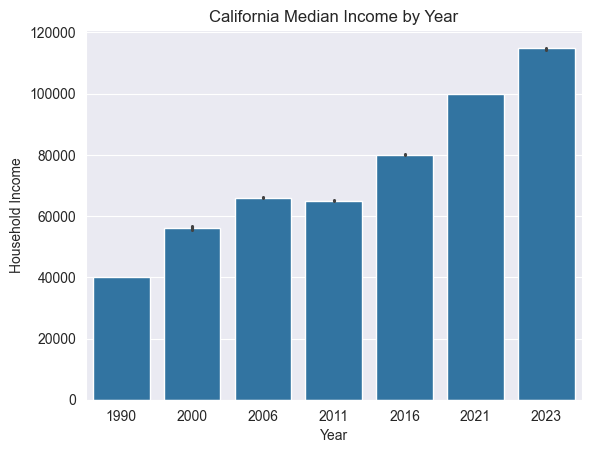

In [317]:
sns.barplot(data=hh_income_data, x='year', y='hh_income', estimator=np.median)

plt.xlabel("Year")
plt.ylabel("Household Income")
plt.title("California Median Income by Year")
plt.show()

### How has income distribution changed in California between 1990 and 2023?

**Create a violin plot of income distribution in California for each of the years in the dataset.**

The range of incomes appears to have qudarupled between 1990 and 2023, with the incomes of the highest earners rising much quicker than those of the lowest and middle earners. Also of note is a big dip in incomes between 2006 and 2011, especially for the highest earners.

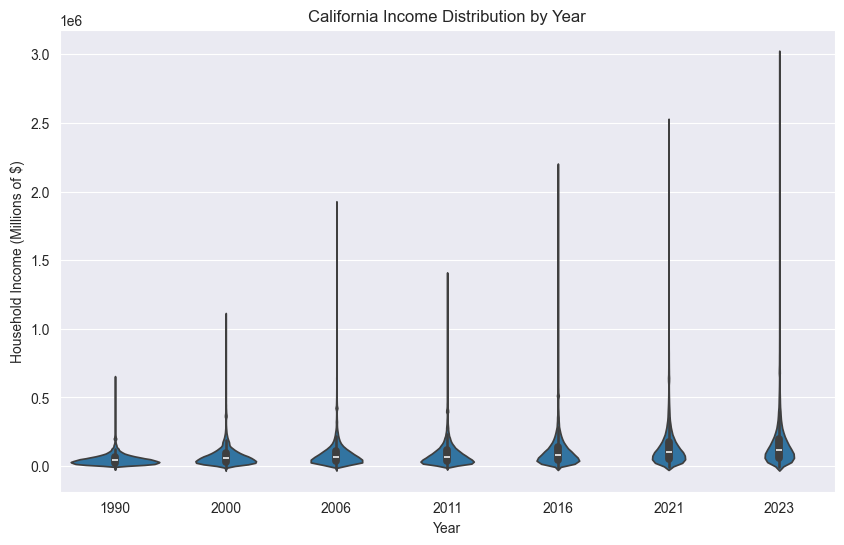

In [318]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=hh_income_data, y='hh_income', x='year')

plt.xlabel("Year")
plt.ylabel("Household Income (Millions of $)")
plt.title("California Income Distribution by Year")
plt.show()

### How has the proportion of renters vs. owners changed in California from 1990 to 2023?

**Rename ownership categories from numerical values to more descriptive names and then get a count of the values in each category (Rent, Own, and NA):** 

In [319]:
ownership = census_data[['year','ownershp']]
ownership['ownershp'] = ownership['ownershp'].replace({0: 'NA', 1: 'Own', 2: 'Rent'})
ownership_by_year = pd.DataFrame(ownership.groupby(['year', 'ownershp']).value_counts()).reset_index()
ownership_by_year.head()

,year,ownershp,count
0,1990,NA,5860
1,1990,Own,167622
2,1990,Rent,117486
3,2000,Own,24063
4,2000,Rent,14080


**Calculate the total number of family units for each year and merge the data with the count values in each ownership category (Rent, Own, and NA). Then, create a new column in the table containing the proportion of renters, owners, and NA for each year.**

In [320]:
ownership_by_year_totals = ownership.groupby('year').count()
ownership_by_year_totals = pd.merge(ownership_by_year, ownership_by_year_totals, on='year', how='inner')
ownership_by_year_totals = ownership_by_year_totals.rename(columns={'ownershp_y': 'yearly_total', 'ownershp_x':'ownership'})
ownership_by_year_totals['proportion'] = ownership_by_year_totals['count']/ownership_by_year_totals['yearly_total']
ownership_by_year_totals.head()

,year,ownership,count,yearly_total,proportion
0,1990,NA,5860,290968,0.020140
1,1990,Own,167622,290968,0.576084
2,1990,Rent,117486,290968,0.403776
3,2000,Own,24063,38143,0.630863
4,2000,Rent,14080,38143,0.369137


**Create a bar plot of the proportion of renters, owners, and NA by year for all of California.**

The proportion of homeowners to renters was steadily increasing up until 2006 and then abruptly declined before starting to slowly rise again leading up to 2023.

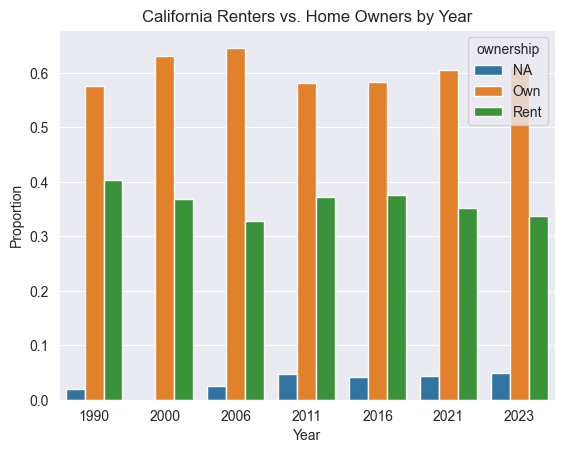

In [321]:
sns.barplot(data=pd.DataFrame(ownership_by_year_totals), y='proportion', x='year', hue='ownership')

plt.xlabel("Year")
plt.ylabel("Proportion")
plt.title("California Renters vs. Home Owners by Year")
plt.show()

### What is the median income of the highest, middle-high, middle, middle-low, and lowest earners (in 20% increments) by year in California?

**Add a column to the dataset categorizing the records of each year by income bracket.**

In [322]:
def categorize(value):
        if value > .80:
            return 'Highest'
        elif value >= .60:
            return 'Middle-high'
        elif value >= .40:
            return 'Middle'
        elif value >= .20:
            return 'Middle-low'
        else:
            return 'Lowest'

hh_income_1990 = hh_income_data[hh_income_data['year']==1990]
hh_income_1990['income_prop'] = hh_income_1990['hh_income']/hh_income_1990['hh_income'].mean()
hh_income_1990['income_category'] = hh_income_1990['income_prop'].apply(categorize)

hh_income_2000 = hh_income_data[hh_income_data['year']==2000]
hh_income_2000['income_prop'] = hh_income_2000['hh_income']/hh_income_2000['hh_income'].mean()
hh_income_2000['income_category'] = hh_income_2000['income_prop'].apply(categorize)

hh_income_2006 = hh_income_data[hh_income_data['year']==2006]
hh_income_2006['income_prop'] = hh_income_2006['hh_income']/hh_income_2006['hh_income'].mean()
hh_income_2006['income_category'] = hh_income_2006['income_prop'].apply(categorize)

hh_income_2011 = hh_income_data[hh_income_data['year']==2011]
hh_income_2011['income_prop'] = hh_income_2011['hh_income']/hh_income_2011['hh_income'].mean()
hh_income_2011['income_category'] = hh_income_2011['income_prop'].apply(categorize)

hh_income_2016 = hh_income_data[hh_income_data['year']==2016]
hh_income_2016['income_prop'] = hh_income_2016['hh_income']/hh_income_2016['hh_income'].mean()
hh_income_2016['income_category'] = hh_income_2016['income_prop'].apply(categorize)

hh_income_2021 = hh_income_data[hh_income_data['year']==2021]
hh_income_2021['income_prop'] = hh_income_2021['hh_income']/hh_income_2021['hh_income'].mean()
hh_income_2021['income_category'] = hh_income_2021['income_prop'].apply(categorize)

hh_income_2023 = hh_income_data[hh_income_data['year']==2023]
hh_income_2023['income_prop'] = hh_income_2023['hh_income']/hh_income_2023['hh_income'].mean()
hh_income_2023['income_category'] = hh_income_2023['income_prop'].apply(categorize)

hh_income_categories = pd.concat([hh_income_1990, hh_income_2000, hh_income_2006, hh_income_2011, hh_income_2016, hh_income_2021, hh_income_2023], ignore_index=True)
hh_income_categories.head()

,year,sample,serial,cbserial,hh_wt,cluster,countyfip,strata,group_quarters,ownershp,...,educd,emp_stat,empl_statd,occ,ind,inctot,ftotinc,poverty,income_prop,income_category
0,1990,199002,46452,NaN,52.0,1.990000e+12,0.0,57,1,1,...,2,3,30,0,0,3984,3984,53,0.081267,Lowest
1,1990,199002,46452,NaN,52.0,1.990000e+12,0.0,57,1,1,...,40,3,30,0,0,0,3984,53,0.081267,Lowest
2,1990,199002,46453,NaN,91.0,1.990000e+12,0.0,44,1,2,...,20,1,10,479,10,860,860,13,0.017542,Lowest
3,1990,199002,46454,NaN,117.0,1.990000e+12,0.0,53,1,1,...,30,3,30,0,0,13535,16929,226,0.345322,Middle-low
4,1990,199002,46454,NaN,117.0,1.990000e+12,0.0,53,1,1,...,50,3,30,0,0,3394,16929,226,0.345322,Middle-low


**Calculate the median income of each of the five income categories by year.**

In [323]:
hh_med_income_categories = pd.DataFrame(hh_income_categories.groupby(['year', 'income_category'])['hh_income'].median()).reset_index()
hh_med_income_categories

,year,income_category,hh_income
0,1990,Highest,62424.0
1,1990,Lowest,6333.0
2,1990,Middle,24658.0
3,1990,Middle-high,34000.0
4,1990,Middle-low,15000.0
5,2000,Highest,95500.0
6,2000,Lowest,9500.0
7,2000,Middle,36600.0
8,2000,Middle-high,51200.0
9,2000,Middle-low,22200.0


**Create a line plot of the median income in California by income bracket and year.**

It looks like the highest earners incomes grew much faster than the lowest earners incomes since 1990 in California. Also of note is an acceleration in the disparity among income brackets starting around 2011.

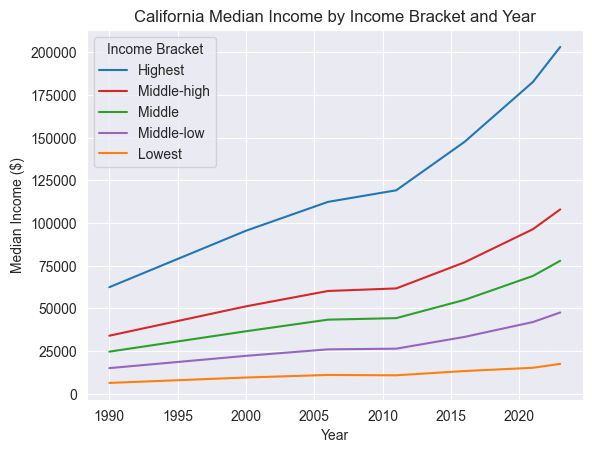

In [324]:
ax = sns.lineplot(data=hh_med_income_categories, x='year', y='hh_income', hue='income_category')

plt.xlabel("Year")
plt.ylabel("Median Income ($)")
plt.title("California Median Income by Income Bracket and Year")

# Create legend
handles, labels = ax.get_legend_handles_labels()
order = [0, 3, 2, 4, 1]
ordered_handles = [handles[i] for i in order]
ordered_labels = [labels[i] for i in order]
ax.legend(ordered_handles, ordered_labels).set_title('Income Bracket')

plt.show()

### How has median home value vs. median income changed in California between 1990 and 2023? 

****First, remove N/A values (denoted by 9999999) from the Household Income (hh_income) column and House Value (house_val) columns to prevent data from being skewed.****

In [325]:
hh_income_and_house_val_data = census_data[(census_data['hh_income'] != 9999999) & (census_data['house_val'] != 9999999)]
hh_income_and_house_val_data.size

46290090

**Add a column to the dataframe calculating House Value (house_val) / Household Income (hh_income).**

In [326]:
hh_income_and_house_val_data['house_val_income'] = hh_income_and_house_val_data['house_val'] / hh_income_and_house_val_data['hh_income']
hh_income_and_house_val_data['house_val_income'].head()

5     2.862595
6     8.571429
7     8.571429
9     2.130682
10    2.589454
Name: house_val_income, dtype: float64

**Create a line plot of median home value vs. median income over time.**

Between 1990 and 2000, the price of a house was about 3 to 3.5 times the median income of a household. By 2007, during the housing market crash, it looks like the median cost of a home was about 6 times the median income. By 2011, the cost of a home was about 3.75 times the median income (but likely harder to get due to new mortgage restrictions). Since then, the cost of a home vs. median income has been steadily rising, with the cost of a home about 5 times the median income in 2023. In other words, it looks like it takes a lot more financial resources to buy a home today (based on 2023 data) than it did in the 1990's and early 2000's.

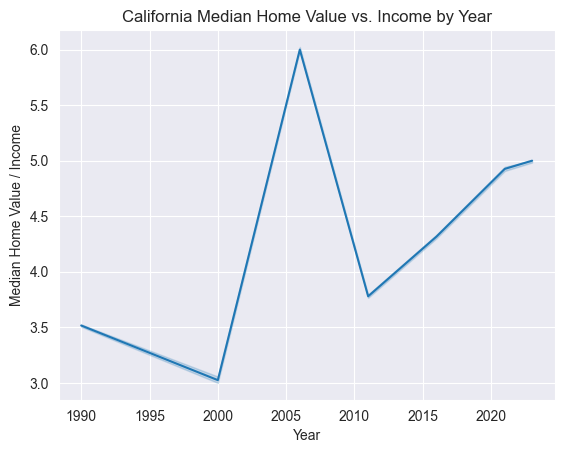

In [327]:
sns.lineplot(data=hh_income_and_house_val_data, x='year', y='house_val_income', estimator=np.median)

plt.xlabel("Year")
plt.ylabel("Median Home Value / Income")
plt.title("California Median Home Value vs. Income by Year")
plt.show()

### How has the proportion of income spent on rent changed in California between 1990 and 2023?

**First, subset data to only those households that are renting.**

In [328]:
hh_income_and_rent_data = census_data[(census_data['ownershp'] == 2)]

**Remove N/A values (denoted by 9999999) from the Household Income (hh_income) column to prevent data from being skewed:**

In [329]:
hh_income_and_rent_data = hh_income_and_rent_data[hh_income_and_rent_data['hh_income'] != 9999999]

**Add a column to the dataframe calculating Annual Rent / Household Income as a %.**

In [330]:
hh_income_and_rent_data['annual_rent'] = hh_income_and_rent_data['rent']*12
hh_income_and_rent_data['rent_income'] = (hh_income_and_rent_data['annual_rent'] / hh_income_and_rent_data['hh_income'])*100

**Remove rows NaN, infinity, zero, negative values from the newly created column (rent_income) to help subset data to only those households that are actively paying rent.** 

In [331]:
hh_income_and_rent_data = hh_income_and_rent_data.dropna(subset=['rent_income'])
hh_income_and_rent_data = hh_income_and_rent_data[~np.isinf(hh_income_and_rent_data['rent_income'])]
hh_income_and_rent_data = hh_income_and_rent_data[hh_income_and_rent_data['rent_income'] != 0]

**Create a line plot of the proportion of income spent on rent over time.**

Among renters, it looks like a little over 23% of one's income was spent on rent between 1990 and 2000. This percentage began to rise drastically in the years leading up to, during, and after the housing crisis of 2007-2009, peaking at around 30% of one's income in 2011. While the expected percentage of one's income that is spent on rent has steadily declined since 2011, the cost of rent was still around 26% of one's income in 2023, which was several percentage points higher than during the 1990's.

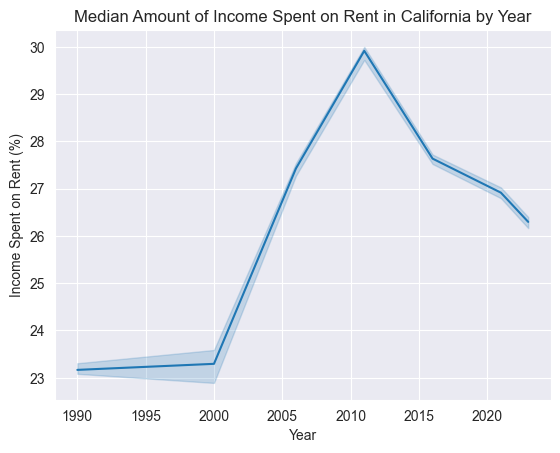

In [332]:
sns.lineplot(data=hh_income_and_rent_data, x='year', y='rent_income', estimator = np.median)

plt.xlabel("Year")
plt.ylabel("Income Spent on Rent (%)")
plt.title("Median Amount of Income Spent on Rent in California by Year")
plt.show()

### How has the average monthly rent cost changed in California between 1990 and 2023?

**Calculate the average monthly rent by year in California (to see exact values).**

In [333]:
hh_income_and_rent_data.groupby('year')['rent'].mean()

year
1990     575.488429
2000     796.011257
2006    1048.008841
2011    1183.541082
2016    1409.028311
2021    1785.275719
2023    2000.966881
Name: rent, dtype: float64

**Create a bar plot to visualize average monthly rent by year in California.**

Average monthly rent has steadily risen from 1990 to 2023, more than tripling in that time frame from around \\$575/month in 1990 to \\$2000/month in 2023. This means that average monthly rent has risen a lot faster than median incomes (as shown in the graph above).

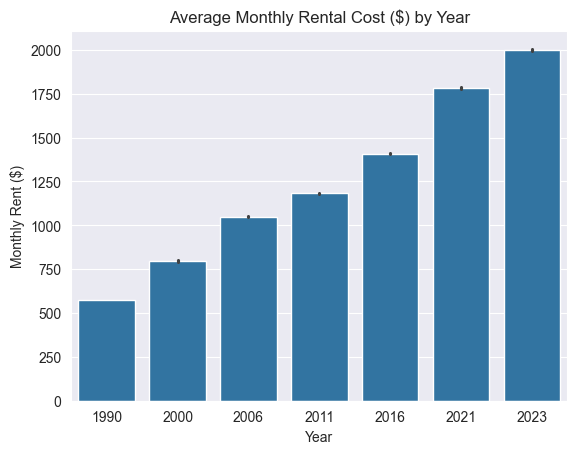

In [334]:
sns.barplot(data=hh_income_and_rent_data, x='year', y='rent', estimator=np.mean)

plt.xlabel("Year")
plt.ylabel("Monthly Rent ($)")
plt.title("Average Monthly Rental Cost ($) by Year")
plt.show()

### How have the average yearly utilites and other bills changed in California between 1990 and 2023?

**To analyze this we will be looking at the columns corresponding to the electric bill, the gas bill, the rent, and the property insurance over a yearly basis**

**First, subset the data getting only the columns we need**

In [335]:
census_data['rent']=census_data['rent']*12
census_bill_data=census_data[['year','cost_elec','cost_gas','rent','prop_insr']]
census_bill_data.head()

,year,cost_elec,cost_gas,rent,prop_insr
0,2000,360,480,9240,0
1,2000,360,480,9240,0
2,2000,480,480,12000,0
3,2000,480,480,12000,0
4,2000,480,480,12000,0


**Compute the yearly average for each cost type for all the years in our dataset**

In [32]:
census_bill_sum=census_bill_data.groupby('year').mean()
census_bill_sum=census_bill_sum.reset_index()
census_bill_sum


,year,cost_elec,cost_gas,rent,prop_insr
0,1990,1122.380520,1815.814416,2783.909763,261.154522
1,2000,1387.743020,2731.692578,3408.683638,419.058097
2,2006,1642.818794,2725.937386,3968.692392,627.012551
3,2011,1659.167908,2766.578462,5089.761562,557.779772
4,2016,1862.033250,3361.847605,6128.306035,631.583049
5,2021,2261.809693,3424.863615,7243.767156,821.523101
6,2023,2716.983613,3658.034763,7828.500512,1007.287318


**Reformat the data to make it easier to visualize**

In [33]:
census_bill_melt = census_bill_sum.melt(id_vars=['year'], value_vars=['cost_elec', 'cost_gas', 'rent', 'prop_insr'],
                                         var_name='cost_type', value_name='Average Cost')
census_bill_melt

,year,cost_type,Average Cost
0,1990,cost_elec,1122.380520
1,2000,cost_elec,1387.743020
2,2006,cost_elec,1642.818794
3,2011,cost_elec,1659.167908
4,2016,cost_elec,1862.033250
5,2021,cost_elec,2261.809693
6,2023,cost_elec,2716.983613
7,1990,cost_gas,1815.814416
8,2000,cost_gas,2731.692578
9,2006,cost_gas,2725.937386


**Create a point plot to visualize the different types of bills/costs over time**

Overall the yearly rent costs seemed to have increased the most relative to the other bills/costs. The electric, gas, and property insurance costs have all had a gradual increase in their yearly costs. In fact, between 2006 and 2011 these three costs didn't change a significant amount with the property insurance costs even decreasing during this period. 

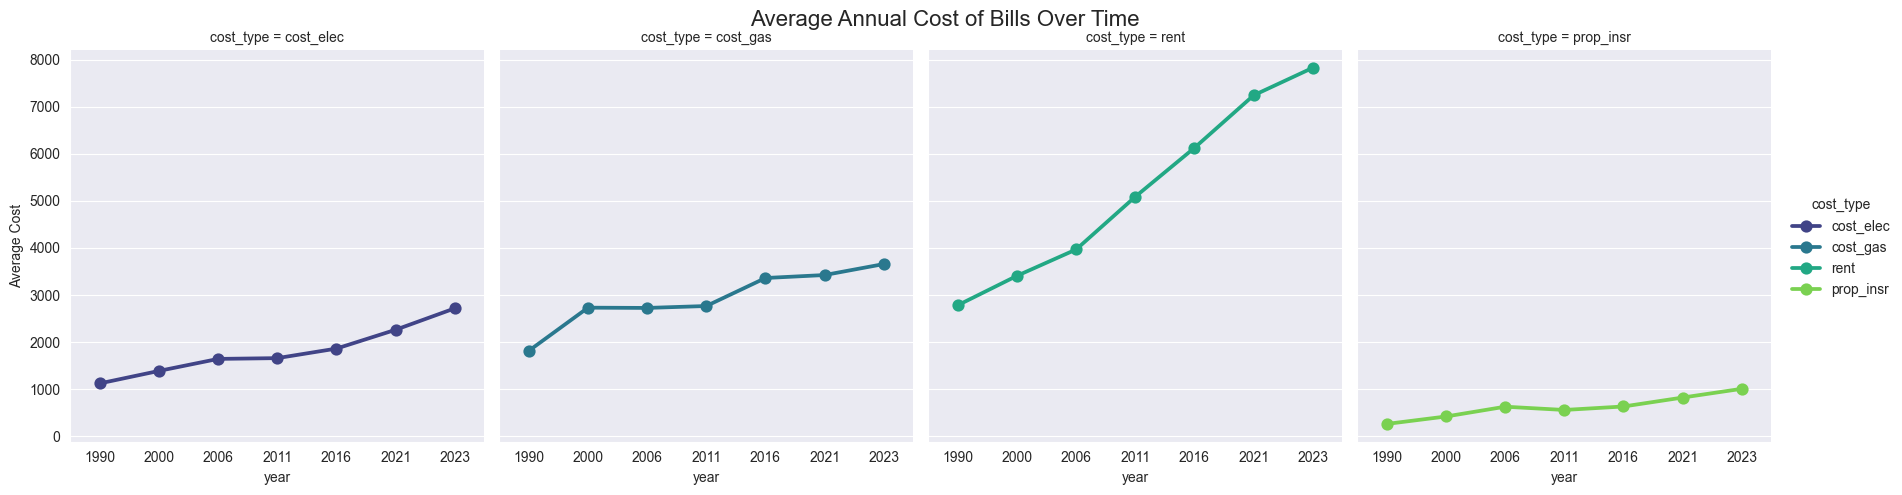

In [34]:
yearly_bills = sns.catplot(data=census_bill_melt, x='year', y='Average Cost', hue='cost_type', col='cost_type', kind='point',  
                height=5, aspect=0.9,palette='viridis')
yearly_bills.fig.subplots_adjust(top=0.9, hspace=0.5)
yearly_bills.fig.suptitle('Average Annual Cost of Bills Over Time', fontsize=16)
plt.show()

### How has the average home ownership age changed in California between 1990 and 2023?

**First, subset data to only those households that own their home.**

In [35]:
home_owner_data = census_data[(census_data['ownershp'] == 1)]

**Calculate the average homeowner age by year in California (to see exact values).**

In [36]:
home_owner_data.groupby('year')['age'].mean()

year
1990    37.256536
2000    39.531231
2006    39.787141
2011    42.417636
2016    43.763237
2021    44.790820
2023    45.223756
Name: age, dtype: float64

**Create a bar plot of average age of homeowners by year in California.**

The average homeowner age in California has steadily risen from about 37 years old in 1990 to 45 years old in 2023.

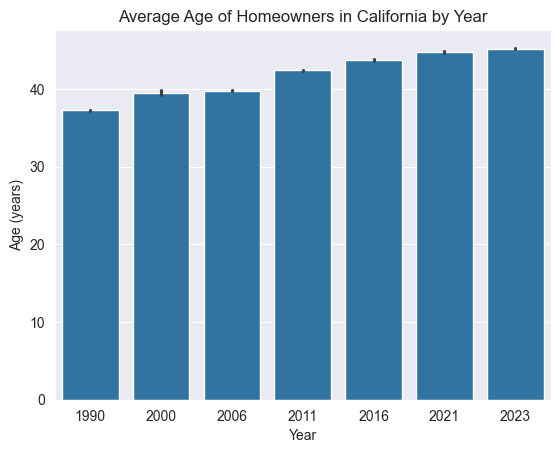

In [37]:
sns.barplot(data=home_owner_data, x='year', y='age')

plt.xlabel("Year")
plt.ylabel("Age (years)")
plt.title("Average Age of Homeowners in California by Year")
plt.show()

### How has the median income in California changed by race between 1990 and 2023?

**Add column to describe the values in the race category and combine those with similar names.**

In [38]:
race_income_data = census_data.copy()
race_income_data['race_desc'] = race_income_data['race'].map({1:'White', 2:'Black', 3:'Native American', 
                                                              4:'Asian', 5:'Asian', 6: 'Asian', 7:'Other/Mixed',
                                                              8:'Other/Mixed', 9:'Other/Mixed'})

**Group median income by race and year.**

In [39]:
race_income_data = pd.DataFrame(race_income_data.groupby(['year','race_desc'])['hh_income'].median()).reset_index()
race_income_data.head()

,year,race_desc,hh_income
0,1990,Asian,45644.0
1,1990,Black,32400.0
2,1990,Native American,31736.0
3,1990,Other/Mixed,30000.0
4,1990,White,44000.0


**Create a line plot showing how median income has changed by race and year.**

Median incomes has risen the fastest for Asians and second fastest for Whites (even though the incomes of these two races were about the same in 1990). Black, Native American, and Mixed/Other median incomes rose at roughly the same rate, but less than for Asians or Whites. Unfortunately, this graph doesn't also show specific changes for Hispanic/Latinos (not added until 2020).

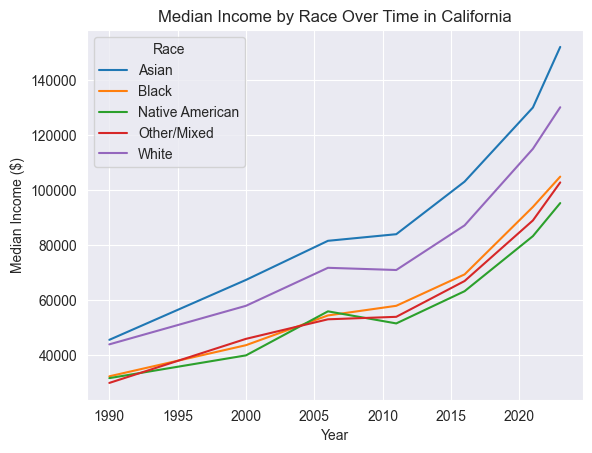

In [40]:
sns.lineplot(data=race_income_data, x='year', y='hh_income', hue='race_desc')

plt.xlabel("Year")
plt.ylabel("Median Income ($)")
plt.legend(title='Race')
plt.title("Median Income by Race Over Time in California")

plt.show()

### How has the median income in California changed by gender between 1990 and 2023?
**Add a new column to describe the values of the sex category column.**

In [347]:
gender_income_data = census_data.copy()
gender_income_data['gender_desc'] = gender_income_data['sex'].map({1:'Male', 2:'Female'})

**Group median income by gender and year.**

In [348]:
gender_income_data = pd.DataFrame(gender_income_data.groupby(['year','gender_desc'])['hh_income'].median()).reset_index()
gender_income_data.head()

,year,gender_desc,hh_income
0,1990,Female,39300.0
1,1990,Male,43000.0
2,2000,Female,53750.0
3,2000,Male,59000.0
4,2006,Female,65000.0


**Create a line plot showing how median income has changed by gender and year.**

Median incomes have always been higher for males than females over this time frame. Both appear to have increased by the same amount  

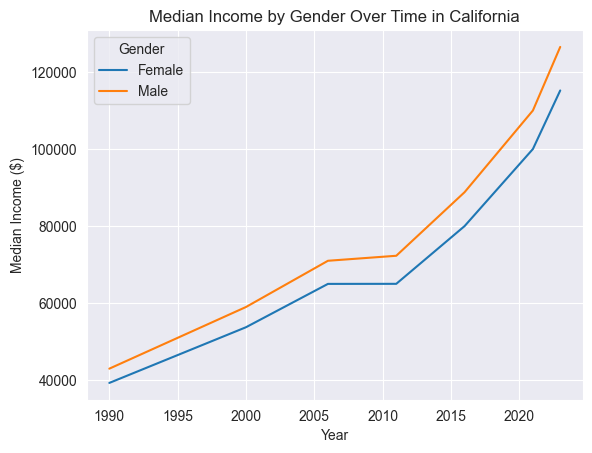

In [345]:
sns.lineplot(data=gender_income_data, x='year', y='hh_income', hue='gender_desc')

plt.xlabel("Year")
plt.ylabel("Median Income ($)")
plt.legend(title='Gender')
plt.title("Median Income by Gender Over Time in California")

plt.show()

#### How has the income gap percent between genders changed over time. 

**Group by gender and year to get the median income in a format that we can use to find the income gap percentage.**

In [370]:
gender_income_gap_data=gender_income_data.groupby(['year','gender_desc'])['hh_income'].median().unstack()
gender_income_gap_data

gender_desc,Female,Male
year,,
1990,39300.0,43000.0
2000,53750.0,59000.0
2006,65000.0,71000.0
2011,65017.0,72300.0
2016,80000.0,88800.0
2021,100000.0,110000.0
2023,115200.0,126500.0


**Add a new column to represent the income gap percentage**

In [373]:
gender_income_gap_data['income_gap']=(gender_income_gap_data['Male']-gender_income_gap_data['Female'])/gender_income_gap_data['Female']*100
gender_income_gap_data

gender_desc,Female,Male,income_gap
year,,,
1990,39300.0,43000.0,9.414758
2000,53750.0,59000.0,9.767442
2006,65000.0,71000.0,9.230769
2011,65017.0,72300.0,11.201686
2016,80000.0,88800.0,11.000000
2021,100000.0,110000.0,10.000000
2023,115200.0,126500.0,9.809028


**Create a line plot showing the income gap percentage has changed over time.**

Between 1990 and 2000, the income gap percentage was increasing before then starting to decrease in 2006. Then, in 2011, there was a sharp increase after which it has steadily been decreasing over time.

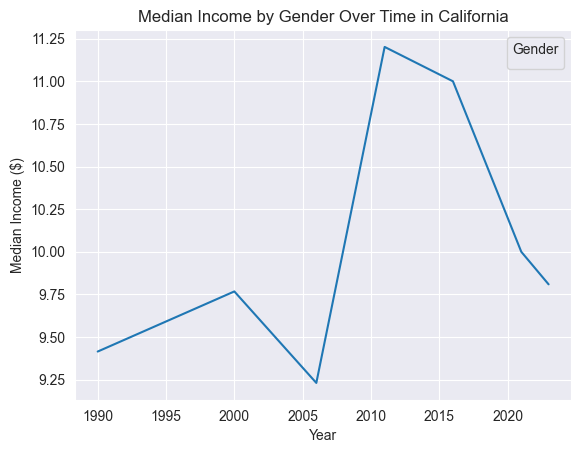

In [372]:
sns.lineplot(data=gender_income_gap_data, x='year', y='income_gap')

plt.xlabel("Year")
plt.ylabel("Median Income ($)")
plt.legend(title='Gender')
plt.title("Median Income by Gender Over Time in California")

plt.show()

### How has the average home ownership age changed by race in California between 1990 and 2023?

**First, calculate the average homeowner age by year and race in California.**

In [41]:
home_owner_race_data = pd.DataFrame(home_owner_data.groupby(['year', 'race'])['age'].mean()).reset_index()

**Add column to describe the values in the race category and combine those with similar names.**

In [42]:
home_owner_race_data['race_desc'] = home_owner_race_data['race'].map({1:'White', 2:'Black', 3:'Native American', 
                                                                      4:'Asian', 5:'Asian', 6: 'Asian', 7:'Other/Mixed',
                                                                      8:'Other/Mixed', 9:'Other/Mixed'})
home_owner_race_data.head()

,year,race,age,race_desc
0,1990,1,38.971685,White
1,1990,2,36.234361,Black
2,1990,3,34.208363,Native American
3,1990,4,33.500000,Asian
4,1990,5,40.752550,Asian


**Plot average home owner age by race and year.**

The average homeowner age appears to be increasing for all races, especially for Whites, Blacks, and Asians, and less so for Native Americans. Interestingly, the Other/Mixed race category shows a very strange trend of having the smallest average homeowner age overall. 

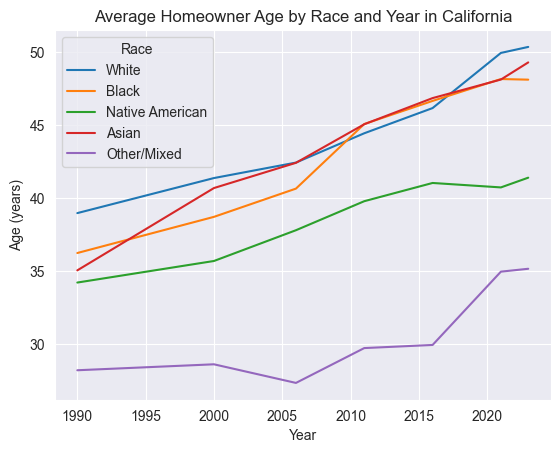

In [43]:
sns.lineplot(data=home_owner_race_data, x='year', y='age', hue='race_desc', ci=None)

plt.xlabel("Year")
plt.ylabel("Age (years)")
plt.legend(title='Race')
plt.title("Average Homeowner Age by Race and Year in California")

plt.show()

### How has average monthly rent cost changed by race in California between 1990 and 2023?

**Add a column to the rental data table to describe values in the race category.**

In [44]:
hh_income_and_rent_data['race_desc'] = hh_income_and_rent_data['race'].map({1:'White', 2:'Black', 3:'Native American', 
                                                                            4:'Asian', 5:'Asian', 6: 'Asian', 7:'Other/Mixed',
                                                                            8:'Other/Mixed', 9:'Other/Mixed'})

**Group average monthly rent by race and year.**

In [45]:
race_rent_data = pd.DataFrame(hh_income_and_rent_data.groupby(['year','race_desc'])['rent'].mean()).reset_index()
race_rent_data.head()

,year,race_desc,rent
0,1990,Asian,594.282105
1,1990,Black,535.093257
2,1990,Native American,484.207289
3,1990,Other/Mixed,511.529825
4,1990,White,600.327434


**Create a line plot showing how average monthly rent has changed by race and year.**

Average monthly rent has risen steadily for all groups, rising the most dramatically for Whites and Asians, second most for Blacks and Other/Mixed race, and the least for Native American. These rises are somewhat similar to what we see in the median income distribution by race.

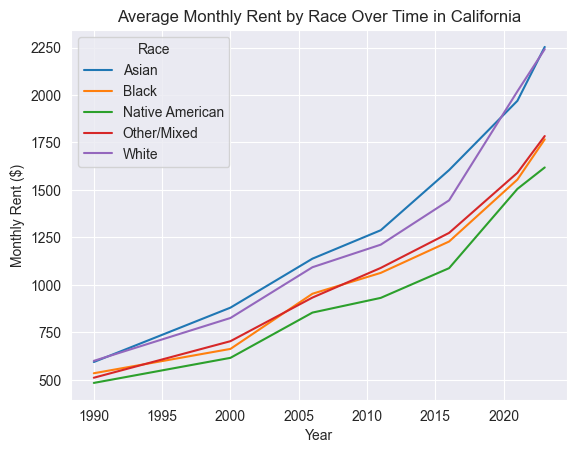

In [46]:
sns.lineplot(data=race_rent_data, x='year', y='rent', hue='race_desc')

plt.xlabel("Year")
plt.ylabel("Monthly Rent ($)")
plt.legend(title='Race')
plt.title("Average Monthly Rent by Race Over Time in California")

plt.show()

### How has the median income in California changed by county between 1990 and 2023?

**First, read in manually created .csv file to translate county fips codes into county names and reset the dataframe index to be county fips code.**

In [47]:
county_fips = pd.read_csv('County_fips.csv')
county_fips = county_fips.set_index('FIPS')
county_fips.head()

,County
FIPS,
1,Alameda
3,Alpine
5,Amador
7,Butte
9,Calaveras


**Remove NaN county fip values from hh_income_data and convert countyfip column to int.**

In [48]:
hh_income_data = hh_income_data.dropna(subset=['countyfip'])
hh_income_data['countyfip'] = hh_income_data['countyfip'].astype(int)

**Turn the county_fips dataframe into a dictionary and use it to create a new column in hh_income that countains county names for each row in the dataset. Then, sort the entire dataset by county name.**

In [49]:
county_dict = county_fips.to_dict()

hh_income_data['county_names'] = hh_income_data['countyfip'].map(county_dict['County'])
hh_income_data = hh_income_data.sort_values(by='county_names')

**Calculate the median income grouped by county name and year, and change column headers for cleaner visual in final plot.**

In [50]:
county_income_data = pd.DataFrame(hh_income_data.groupby(['year','county_names'])['hh_income'].median()).reset_index()
county_income_data = county_income_data.rename(columns={'year': 'Year', 'county_names': 'County', 'hh_income': 'Median Income ($)'})
county_income_data.head()

,Year,County,Median Income ($)
0,1990,Alameda,44639.0
1,1990,Butte,26546.5
2,1990,Contra Costa,50276.0
3,1990,El Dorado,41200.0
4,1990,Fresno,29634.0


**Create several bar plots of median income in relation to county name for each year in the dataset (excluding the year 2000 since the fips codes were unavailable for that year).**

It looks like there was increasing median income variability between 1990 and 2023 between counties, with some counties median incomes increasing much faster than other counties. 

Note: Unfortunately, the sample size of data is not able to capture the counties with a population size <65,000, which would have been interesting to look at to compare rural vs. urban counties. Also, for unknown reasons, Monterey doesn't show for every year even though its population size is large enough. The year 2000 isn't shown as well since its sample size was too small to look at county-level data.

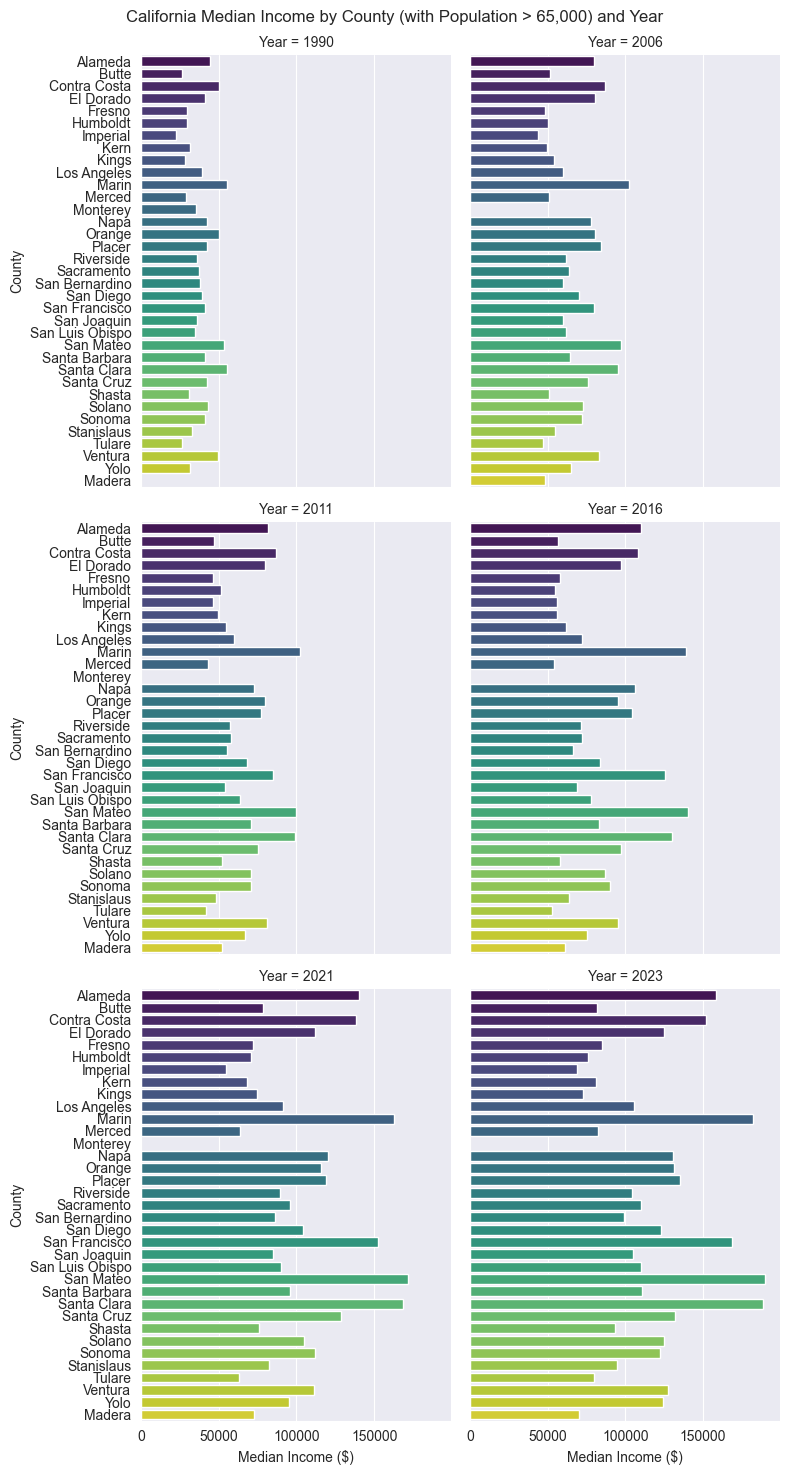

In [51]:
g = sns.catplot(data=county_income_data, y='County', x='Median Income ($)', col='Year', col_wrap=2, 
                kind='bar', height=5, aspect=0.8, palette='viridis')

# Add a title to the plots
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('California Median Income by County (with Population > 65,000) and Year')

plt.show()

### How has the average monthly rent cost in California changed by county between 1990 and 2023?

**Remove NaN county fip values from hh_income_rent_data and convert countyfip column to int.**

In [52]:
hh_income_and_rent_data = hh_income_and_rent_data.dropna(subset=['countyfip'])
hh_income_and_rent_data['countyfip'] = hh_income_and_rent_data['countyfip'].astype(int)

**Create a new column in hh_income_and_rent_data that countains county names for each row in the dataset. Then, sort the entire dataset by county name.**

In [53]:
hh_income_and_rent_data['county_names'] = hh_income_and_rent_data['countyfip'].map(county_dict['County'])
hh_income_and_rent_data = hh_income_and_rent_data.sort_values(by='county_names')

**Calculate the average monthly rent cost grouped by county name and year, and change column headers for cleaner visual in final plot.**

In [54]:
county_rent_data = pd.DataFrame(hh_income_and_rent_data.groupby(['year','county_names'])['rent'].mean()).reset_index()
county_rent_data = county_rent_data.rename(columns={'year': 'Year', 'county_names': 'County', 'rent': 'Average Monthly Rent ($)'})
county_rent_data.head()

,Year,County,Average Monthly Rent ($)
0,1990,Alameda,605.008715
1,1990,Butte,402.596059
2,1990,Contra Costa,640.210789
3,1990,El Dorado,498.049080
4,1990,Fresno,348.429778


**Create several bar plots of average monthly rent in relation to county name for each year in the dataset (excluding the year 2000 since the fips codes were unavailable for that year).**

The average monthly rent cost shows a very similar pattern to median income with increasing average monthly rent variability between 1990 and 2023 between counties, with some counties average monthly rent increasing much faster than other counties.  

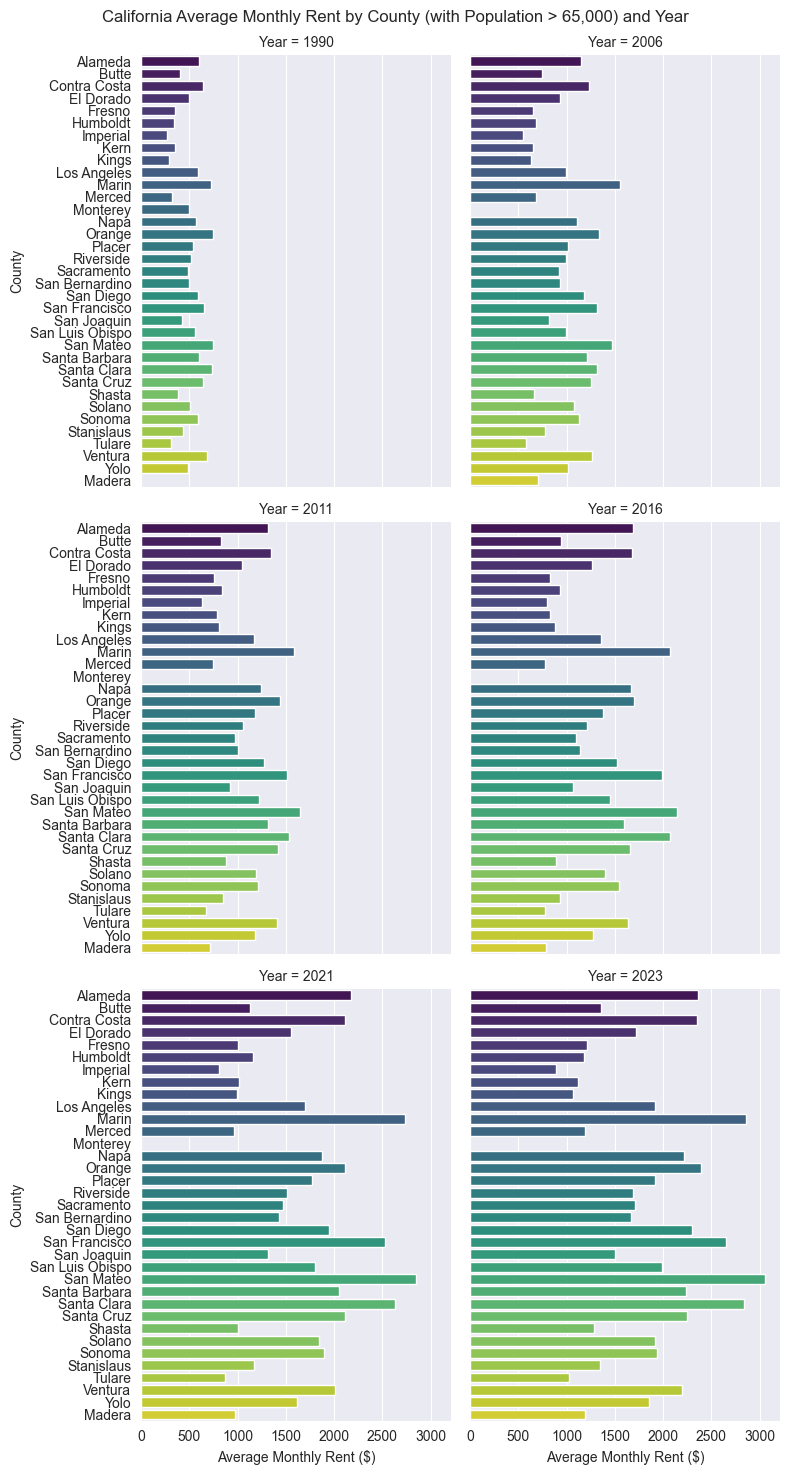

In [55]:
g = sns.catplot(data=county_rent_data, y='County', x='Average Monthly Rent ($)', col='Year', col_wrap=2, 
                kind='bar', height=5, aspect=0.8, palette='viridis')

# Add a title to the plots
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('California Average Monthly Rent by County (with Population > 65,000) and Year')

plt.show()

### How has the average home value in California changed by county between 1990 and 2023? 

**Remove NaN county fip values from hh_income_and_house_val_data and convert countyfip column to int.**

In [56]:
hh_income_and_house_val_data = hh_income_and_house_val_data.dropna(subset=['countyfip'])
hh_income_and_house_val_data['countyfip'] = hh_income_and_house_val_data['countyfip'].astype(int)

**Create a new column in hh_income_and_house_val_data that countains county names for each row in the dataset. Then, sort the entire dataset by county name.**

In [57]:
hh_income_and_house_val_data['county_names'] = hh_income_and_house_val_data['countyfip'].map(county_dict['County'])
hh_income_and_house_val_data = hh_income_and_house_val_data.sort_values(by='county_names')

**Calculate the average home value grouped by county name and year, and change column headers for cleaner visual in final plot.**

In [58]:
county_home_val_data = pd.DataFrame(hh_income_and_house_val_data.groupby(['year','county_names'])['house_val'].mean()).reset_index()
county_home_val_data = county_home_val_data.rename(columns={'year': 'Year', 'county_names': 'County', 'house_val': 'Average House Value ($1,000,000)'})
county_home_val_data.head()

,Year,County,"Average House Value ($1,000,000)"
0,1990,Alameda,239647.433278
1,1990,Butte,99089.845803
2,1990,Contra Costa,235961.703916
3,1990,El Dorado,184737.404073
4,1990,Fresno,100327.575859


**Create several bar plots of average home value in relation to county name for each year in the dataset (excluding the year 2000 since the fips codes were unavailable for that year).**

Similar to median income and average rent, average home values have shown increasing variability between counties between 1990 and 2023, with some counties home values increasing much faster than other counties. This pattern is particularly pronounced after the housing market crash of 2007-2009.

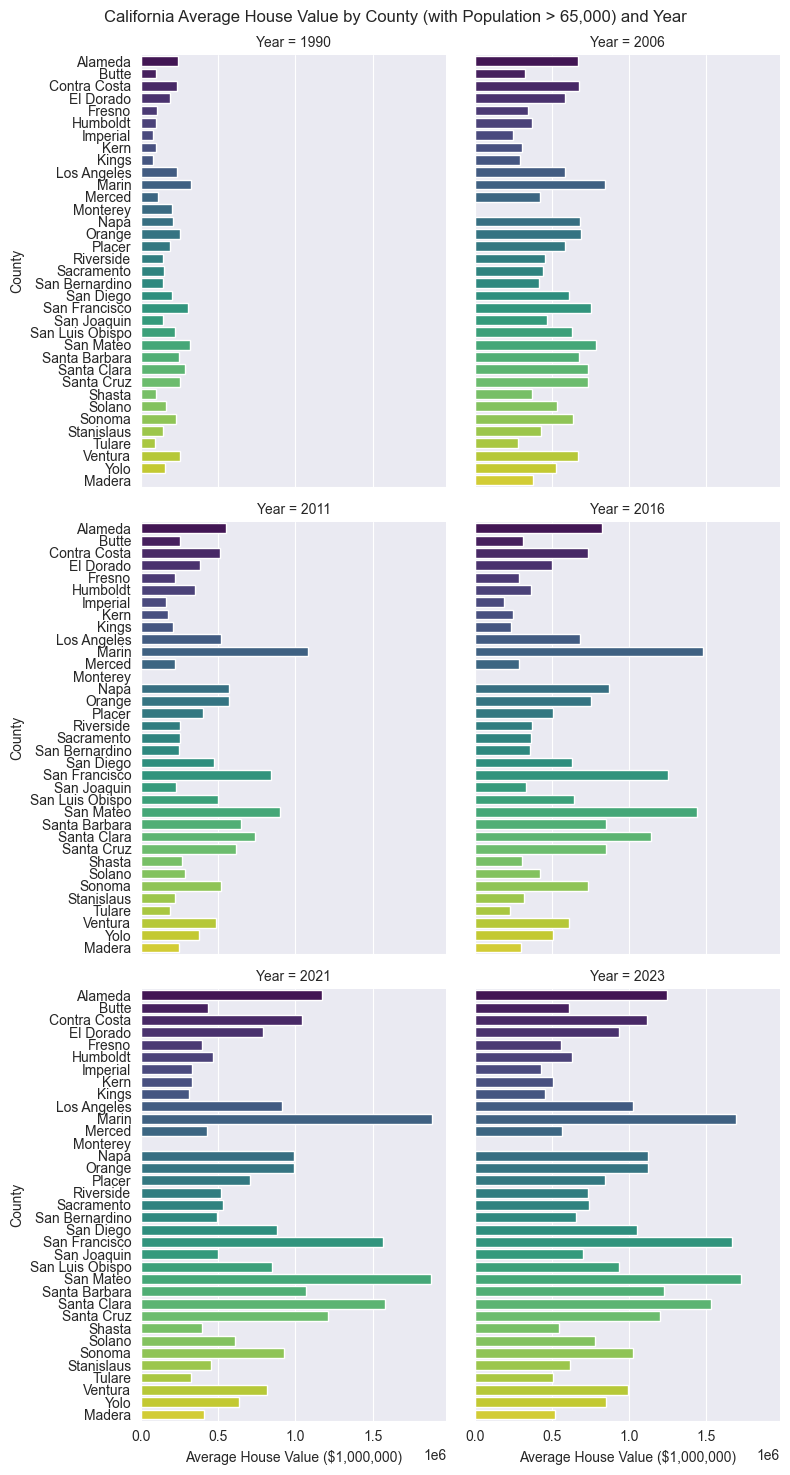

In [59]:
g = sns.catplot(data=county_home_val_data, y='County', x='Average House Value ($1,000,000)', col='Year', col_wrap=2, 
                kind='bar', height=5, aspect=0.8, palette='viridis')

# Add a title to the plots
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('California Average House Value by County (with Population > 65,000) and Year')

plt.show()

### How have specific occupations changed in California over time?

**View the current occupation column in the census dataframe**

The current occupation column contains a three digit occupation code.

In [260]:
census_data['occ'].info()
census_data['occ']

<class 'pandas.core.series.Series'>
RangeIndex: 2198057 entries, 0 to 2198056
Series name: occ
Non-Null Count    Dtype
--------------    -----
2198057 non-null  int64
dtypes: int64(1)
memory usage: 16.8 MB


0          330
1          260
2          524
3            0
4            0
          ... 
2198052      0
2198053      0
2198054    354
2198055    678
2198056    274
Name: occ, Length: 2198057, dtype: int64

#### Convert the current occupation code into its corresponding value using web scraping

**Access the website https://usa.ipums.org/usa/volii/occ2000.shtml which contains a table describing some of the occupation codes the census data uses.** 

The table also contains two classifications for each occupation code listed in the table which are stored as table header elements. One of these classifications is a very general occupation category like Management, Business and Financial Operations or Professional and Related Occupations. The other is a more specific occupation category like Management Occupations and Business Operations Specialists. For our purposes, we will be grabbing the occupation value and its specific occupation category information for each available occupation code.


In [261]:
page=requests.get('https://usa.ipums.org/usa/volii/occ2000.shtml')
page

<Response [200]>

**Use beautiful soup to clean the output of the html from the website**

In [262]:
page_text=page.text
page_text
soup=BeautifulSoup(page_text)

**Record the table element which contains the relevant information**


In [263]:
table1_code=soup.find_all('table')[1]

**Convert this table into a dataframe**

The website shows the 1% Census Date Codes and the 5% Census Date Codes. As we use the 1% data, we are only concerned with the 1% File column (hence why we don't include the column at index 1).

In [264]:
nested_list = []  
for i in table1_code.find_all('tr'):
  row_i=[]
  for j in i.find_all('td'):
     row_i.append(j.text)
  nested_list.append(row_i)

table1_df = pd.DataFrame(nested_list)
table1_df=table1_df.drop(columns=1)
table1_df=table1_df.rename(columns={
    0:'occ',
    2:'job_type'})
table1_df

,occ,job_type
0,None,None
1,None,None
2,000,"N/A (Under 16 years or not in the labor force,..."
3,None,None
4,None,None
...,...,...
540,981,First-Line Enlisted Military Supervisors/Managers
541,982,Military Enlisted Tactical Operations and Air/...
542,983,"Military, Rank Not Specified (Census only)"
543,None,None


**Remove the N/A values from this new table**

In [265]:
table1_df=table1_df.dropna()
table1_df=table1_df.reset_index(drop=True)

#### Prepare to merge the new table with our main census dataframe


**This adds a new column containing all the occupation codes from the census dataframe (0-992) to the table dataframe in order to properly merge them later**

In [266]:
array_occ = [str(i).zfill(3) for i in range(993)]
full_df = pd.DataFrame({'occ': array_occ})
full_df['occ'] = full_df['occ'].astype(int)
table1_df['occ'] = table1_df['occ'].astype(int)
table1_df = full_df.merge(table1_df, on='occ', how='left')
table1_df

,occ,job_type
0,0,"N/A (Under 16 years or not in the labor force,..."
1,1,Chief Executives
2,2,General and Operations Managers
3,3,Legislators
4,4,Advertising and Promotions Managers
...,...,...
988,988,NaN
989,989,NaN
990,990,NaN
991,991,NaN


**Create a function that will map the specific occupation categories to the corresponding occupation codes**


Unfortunately the structure of the table prevents us from using webscraping to easily add the occupation types (as they are table headers elements which just span the columns). Also note that the webpage is missing the occupation categories and occupation types for a significant amount of the occupation codes present in the census dataframe hence why the ranges are not very continuous and there may be many N/As for their descriptions. 

In [267]:
def map_occ_cat_spec(occ_code):

    if occ_code == '0':
        return 'N/A (Under 16 years or not in the labor force)'
    elif 1 <= int(occ_code) <= 6 or 10 <= int(occ_code) <= 16 or 20 <= int(occ_code) <= 23 or 30 <= int(occ_code) <= 36 or 40 <= int(occ_code) <= 43:
        return 'Management Occupations'
    elif 50 <= int(occ_code) <= 54 or int(occ_code)==56 or int(occ_code)==60 or int(occ_code)==62 or 70 <= int(occ_code) <= 73:
        return 'Business Operations Specialists'
    elif 80 <= int(occ_code) <= 86 or 90 <= int(occ_code) <= 95:
        return 'Financial Specialists'
    elif 100 <= int(occ_code) <= 102 or int(occ_code)==104 or int(occ_code)==106 or 110 <= int(occ_code) <= 111 or 120 <= int(occ_code) <= 124:
        return 'Computer and Mathematical Occupations'
    elif 130 <= int(occ_code) <= 136 or 140 <= int(occ_code) <= 146 or 150 <= int(occ_code) <= 156:
        return 'Architecture and Engineering Occupations'
    elif 160 <= int(occ_code) <= 161 or 164 <= int(occ_code) <= 165 or 170 <= int(occ_code) <= 172 or int(occ_code)==174 or int(occ_code)==176 or 180<= int(occ_code) <= 184  or int(occ_code)==186 or 190<= int(occ_code) <= 194 or int(occ_code)==196:
        return 'Life, Physical, and Social Science Occupations'
    elif 200 <= int(occ_code) <= 206:
        return 'Community and Social Services Occupations'
    elif 210 <= int(occ_code) <= 211 or 214 <= int(occ_code) <= 215:
        return 'Legal Occupations'
    elif int(occ_code)==220 or 230 <= int(occ_code) <= 234 or int(occ_code)==240 or 243 <= int(occ_code) <= 244 or 254 <= int(occ_code) <= 255:
        return 'Education, Training, and Library Occupations'
    elif int(occ_code)==260 or int(occ_code)==263 or 270 <= int(occ_code) <= 272 or 274 <= int(occ_code) <= 276 or 280 <= int(occ_code) <= 286 or 290 <= int(occ_code) <= 292 or int(occ_code)==296:
        return 'Arts, Design, Entertainment, Sports, and Media Occupations'
    elif 300 <= int(occ_code) <= 306 or 311 <= int(occ_code) <= 316 or 320 <= int(occ_code) <= 326 or 330 <= int(occ_code) <= 332 or 340 <= int(occ_code) <= 341 or 350 <= int(occ_code) <= 354:
        return 'Healthcare Practitioners and Technical Occupations' 
    elif 360 <= int(occ_code) <= 365:
        return 'Healthcare Support Occupations'
    elif 370 <= int(occ_code) <= 375 or int(occ_code)==380 or 382 <= int(occ_code) <= 386 or 390 <= int(occ_code) <= 392 or 392<= int(occ_code) <= 395:
        return 'Protective Service Occupations'
    elif 400 <= int(occ_code) <= 406 or 411 <= int(occ_code) <= 416:
        return 'Food Preparation and Serving Occupations'
    elif 420 <= int(occ_code) <= 425:
        return 'Building and Grounds Cleaning and Maintenance Occupations'
    elif int(occ_code)==430 or int(occ_code)==432 or 434 <= int(occ_code) <= 435 or  440 <= int(occ_code) <= 443 or int(occ_code)==446 or 450 <= int(occ_code) <= 455 or  460 <= int(occ_code) <= 462 or 464 <= int(occ_code) <= 465:
        return 'Personal Care and Service Occupations'
    elif 470 <= int(occ_code) <= 472 or  474 <= int(occ_code) <= 476 or  480 <= int(occ_code) <= 485 or int(occ_code)==490 or 492 <= int(occ_code) <= 496:
        return 'Sales Occupations'
    elif 500 <= int(occ_code) <= 503 or 510 <= int(occ_code) <= 516 or 520 <= int(occ_code) <= 526 or 530 <= int(occ_code) <= 536 or 540 <= int(occ_code) <= 542 or 550<= int(occ_code) <= 556 or 560 <= int(occ_code) <= 563 or int(occ_code)==570 or  580 <= int(occ_code) <= 586 or 590 <= int(occ_code) <= 593:
        return 'Office and Administrative Support Occupations'
    elif 600 <= int(occ_code) <= 602 or 604 <= int(occ_code) <= 605 or 610 <= int(occ_code) <= 613:
        return 'Farming, Fishing, and Forestry Occupations'
    elif 620 <= int(occ_code) <= 626 or 630 <= int(occ_code) <= 633 or 635 <= int(occ_code) <= 636 or int(occ_code)==640 or 642 <= int(occ_code) <= 644 or int(occ_code)==646 or 650 <= int(occ_code) <= 653 or int(occ_code)==660 or int(occ_code)==666 or 670 <= int(occ_code) <= 676:
        return 'Construction Trades'
    elif int(occ_code)==680 or 682<= int(occ_code) <= 684 or 691<= int(occ_code) <= 694:
        return 'Extraction Workers'
    elif 700 <= int(occ_code) <= 705 or 710 <= int(occ_code) <= 716 or 720 <= int(occ_code) <= 722 or int(occ_code)==724 or int(occ_code)==726 or 730 <= int(occ_code) <= 736 or 741 <= int(occ_code) <= 743 or 751 <= int(occ_code) <= 752 or 754 <= int(occ_code) <= 756 or  760 <= int(occ_code) <= 762:
        return 'Installation, Maintenance, and Repair Workers'
    elif 770 <= int(occ_code) <= 775 or 780 <= int(occ_code) <= 781 or 783 <= int(occ_code) <= 785 or int(occ_code)==790 or 792<= int(occ_code) <= 796 or 800<= int(occ_code) <= 806 or int(occ_code)==810 or 812 <= int(occ_code) <= 816 or 820 <= int(occ_code) <= 826 or 830 <= int(occ_code) <= 836 or  840 <= int(occ_code) <= 846 or  850 <= int(occ_code) <= 855 or 860 <= int(occ_code) <= 865 or 871 <= int(occ_code) <= 876 or 880 <= int(occ_code) <= 881 or 883 <= int(occ_code) <= 886 or 890<= int(occ_code) <= 896:
        return 'Production Occupations'
    elif int(occ_code)==900 or 903<= int(occ_code) <= 904 or 911 <= int(occ_code) <= 915 or int(occ_code)==920 or 923 <= int(occ_code) <= 924 or int(occ_code)==926 or 930 <= int(occ_code) <= 936 or 941 <= int(occ_code) <= 942   or 950 <= int(occ_code) <= 952 or int(occ_code)==956 or 960 <= int(occ_code) <= 965 or 972<= int(occ_code) <= 975:
        return 'Transportation and Material Moving Occupations'
    elif 980 <= int(occ_code) <= 983:
        return 'Military Specific Occupations'
    elif int(occ_code) == 992:
        return 'Unemployed'
    else:
        return 'N/A'

**Add the occupation category to our dataframe of the table from the website**

In [268]:
table1_df['occ_cat']=table1_df['occ']
table1_df

table1_df['occ_cat'] = table1_df['occ'].apply(map_occ_cat_spec)
table1_df

,occ,job_type,occ_cat
0,0,"N/A (Under 16 years or not in the labor force,...",N/A
1,1,Chief Executives,Management Occupations
2,2,General and Operations Managers,Management Occupations
3,3,Legislators,Management Occupations
4,4,Advertising and Promotions Managers,Management Occupations
...,...,...,...
988,988,NaN,N/A
989,989,NaN,N/A
990,990,NaN,N/A
991,991,NaN,N/A


**Create a new census dataframe which we will merge with the table1_df**

In [269]:
census_data_w_occ=census_data.copy()

**Merge the dataframes to have a new census dataframe containing information about the occupation code**

In [270]:
census_data_w_occ=census_data_w_occ.merge(table1_df)
census_data_w_occ.head()

,year,sample,serial,cbserial,hh_wt,cluster,countyfip,strata,group_quarters,ownershp,...,educd,emp_stat,empl_statd,occ,ind,inctot,ftotinc,poverty,job_type,occ_cat
0,2000,200004,7,NaN,600.0,2.000000e+12,NaN,6,1,2,...,101,1,10,330,819,52000,177000,501,Clinical Laboratory Technologists and Technicians,Healthcare Practitioners and Technical Occupat...
1,2000,200004,7,NaN,600.0,2.000000e+12,NaN,6,1,2,...,114,1,10,260,657,125000,177000,501,Artists and Related Workers,"Arts, Design, Entertainment, Sports, and Media..."
2,2000,200004,21,NaN,1800.0,2.000000e+12,NaN,6,1,2,...,62,1,10,524,639,6000,6000,44,Customer Service Representatives,Office and Administrative Support Occupations
3,2000,200004,21,NaN,1800.0,2.000000e+12,NaN,6,1,2,...,1,0,0,0,0,9999999,6000,44,"N/A (Under 16 years or not in the labor force,...",N/A
4,2000,200004,21,NaN,1800.0,2.000000e+12,NaN,6,1,2,...,10,0,0,0,0,9999999,6000,44,"N/A (Under 16 years or not in the labor force,...",N/A


**Look at the shape of the dataframe prior to removing N/A values**

In [271]:
census_data_w_occ.shape

(1272605, 37)

**First, remove N/A values (denoted by 9999999) from the Income column (inctot) to prevent the data from being skewed**

In [272]:
census_data_w_occ=census_data_w_occ[census_data_w_occ['inctot'] != 9999999]
census_data_w_occ.shape

(873134, 37)

**Subset and look at the new columns in our dataframe**

In [274]:
census_data_w_occ_sub=census_data_w_occ[['occ_cat','job_type']]
census_data_w_occ_sub.dtypes

occ_cat     object
job_type    object
dtype: object

**Look at the distribution of the occupation categories**

A large number of these values are still N/A for the occupation categories even after removing many of the N/A values from the dataset. It is not necessary to remove these N/A values as they still have useful information just don't have a general occupation category.

In [277]:
census_data_w_occ_sub.groupby('occ_cat').count().sort_values('job_type',ascending=False)

,job_type
occ_cat,
N/A,505967
Personal Care and Service Occupations,37053
Management Occupations,35426
Production Occupations,30947
"Education, Training, and Library Occupations",20703
Healthcare Practitioners and Technical Occupations,16321
"Installation, Maintenance, and Repair Workers",15645
Computer and Mathematical Occupations,13891
Office and Administrative Support Occupations,13014


**Create several bar plots displaying the average income for each occupation category for all the years in our dataset**

Generally it appears that all the occupation categories had an increase in income over time. It is still difficult to tell which categories grew the most. The next visualization will show this more clearly.

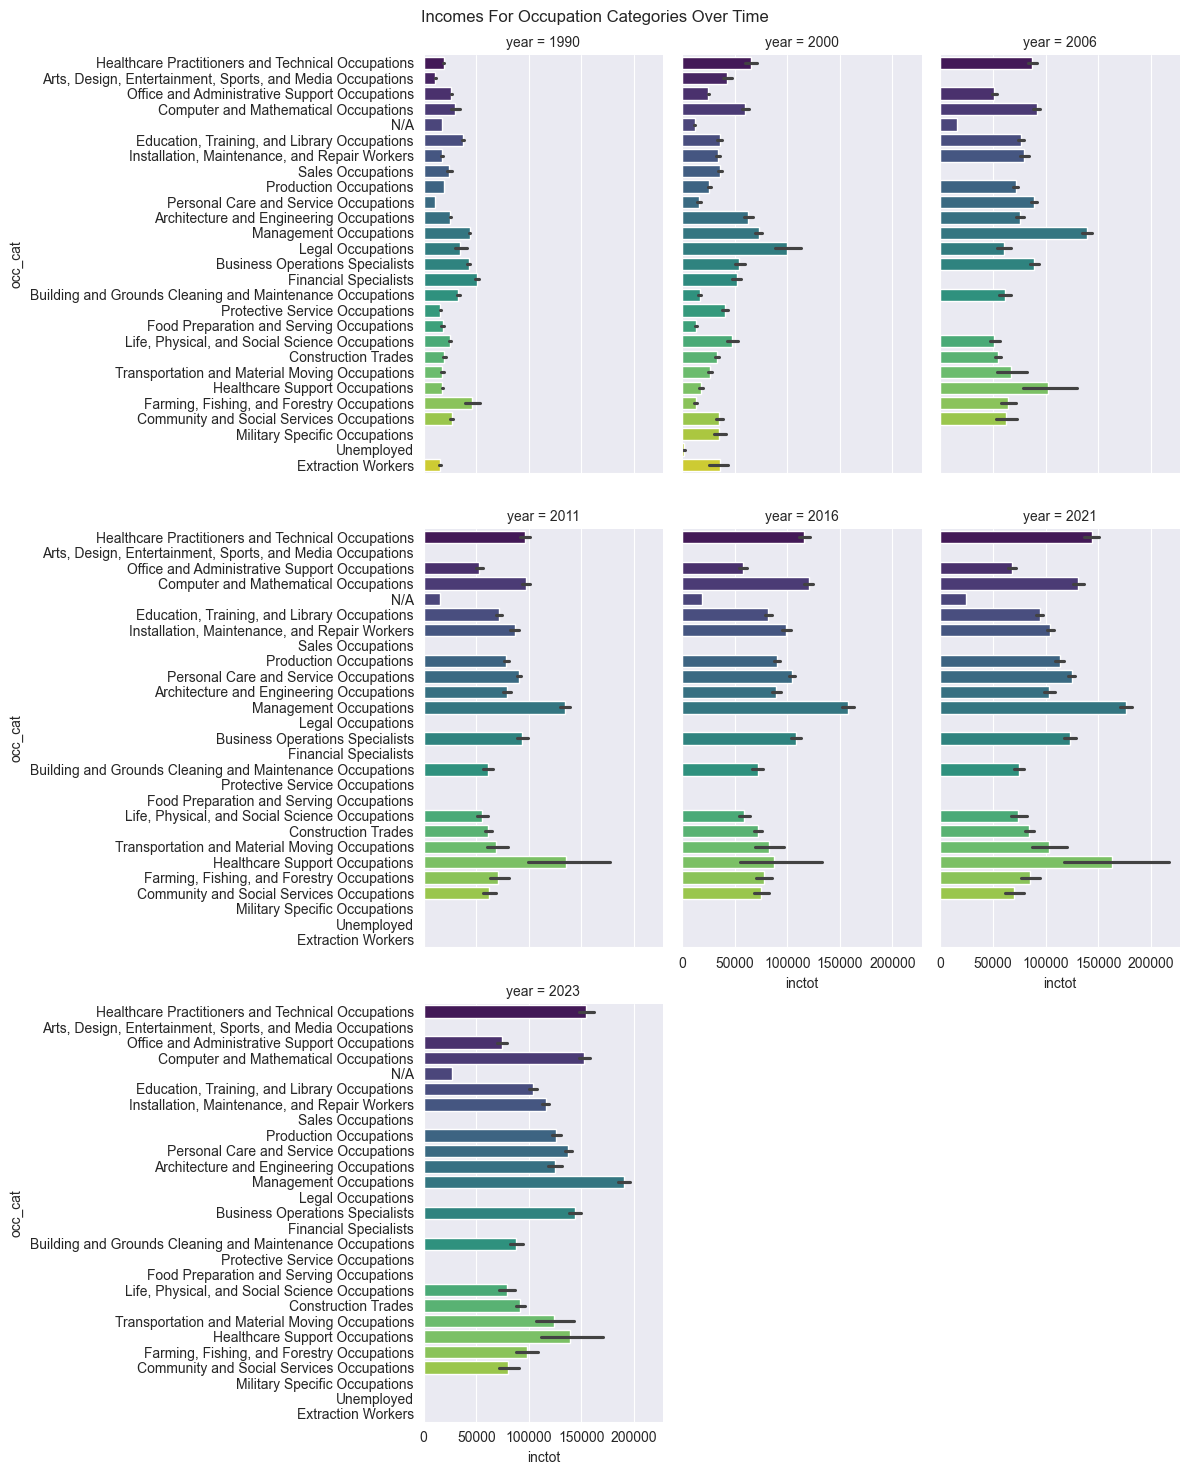

In [230]:
g = sns.catplot(data=census_data_w_occ, y='occ_cat', x='inctot', col='year', col_wrap=3, hue='occ_cat',
                kind='bar', height=5, aspect=0.8, palette='viridis',estimator=np.mean)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Incomes For Occupation Categories Over Time')
plt.show()

**Create a dataframe showing the average income for each occupation for each year which we can then use to find the percent change for each category.**

In [195]:
income_for_each_occ_cat=census_data_w_occ.groupby(['year','occ_cat'])['inctot'].mean().reset_index()
income_for_each_occ_cat

,year,occ_cat,inctot
0,1990,Architecture and Engineering Occupations,25484.643489
1,1990,"Arts, Design, Entertainment, Sports, and Media...",11197.997620
2,1990,Building and Grounds Cleaning and Maintenance ...,33047.692500
3,1990,Business Operations Specialists,42723.334056
4,1990,Community and Social Services Occupations,26719.409786
...,...,...,...
138,2023,N/A,27043.584283
139,2023,Office and Administrative Support Occupations,74270.824903
140,2023,Personal Care and Service Occupations,137523.705523
141,2023,Production Occupations,126230.799805


**Filter this to find the percent change between our oldest census data (1990) and our newest (2023)**

In [225]:
income_for_each_occ_cat_chosen_years=income_for_each_occ_cat[(income_for_each_occ_cat['year']==1990) | (income_for_each_occ_cat['year']==2023)]


Pivot the filtered dataframe to make it easier to find the percent change between these years

In [87]:

income_occ_cat_pivoted = income_for_each_occ_cat_chosen_years.pivot(index='occ_cat', columns='year', values='inctot').reset_index()
income_occ_cat_pivoted.head()


year,occ_cat,1990,2023
0,Architecture and Engineering Occupations,25484.643489,124953.165266
1,"Arts, Design, Entertainment, Sports, and Media...",11197.997620,NaN
2,Building and Grounds Cleaning and Maintenance ...,33047.692500,88130.879265
3,Business Operations Specialists,42723.334056,144266.927237
4,Community and Social Services Occupations,26719.409786,80256.736264


This calculates the percent change and adds it to the dataframe. Additionally, this sorts the percent change in descending order to make the visualization clearer.

In [88]:
income_occ_cat_pivoted['percent_change']=(income_occ_cat_pivoted[2023]-income_occ_cat_pivoted[1990])/income_occ_cat_pivoted[1990]*100
income_occ_cat_pivoted=income_occ_cat_pivoted.sort_values('percent_change',ascending=False)
income_occ_cat_pivoted.head()

year,occ_cat,1990,2023,percent_change
19,Personal Care and Service Occupations,10970.828440,137523.705523,1153.539842
12,Healthcare Practitioners and Technical Occupat...,18931.002984,154802.597525,717.720000
13,Healthcare Support Occupations,17714.709730,139316.883117,686.447451
23,Transportation and Material Moving Occupations,17843.251488,124223.905579,596.195453
14,"Installation, Maintenance, and Repair Workers",17394.721893,116033.776429,567.063131


**Create a bar plot displaying the percent change in average income for each occupation category between 1990 and 2023**

Overall any occupation categories which had information from both years had a significant positive increase in income between these years. Specifically, personal and healthcare occupations had the highest percent change between these years with it even 10x for personal care and service occupations.

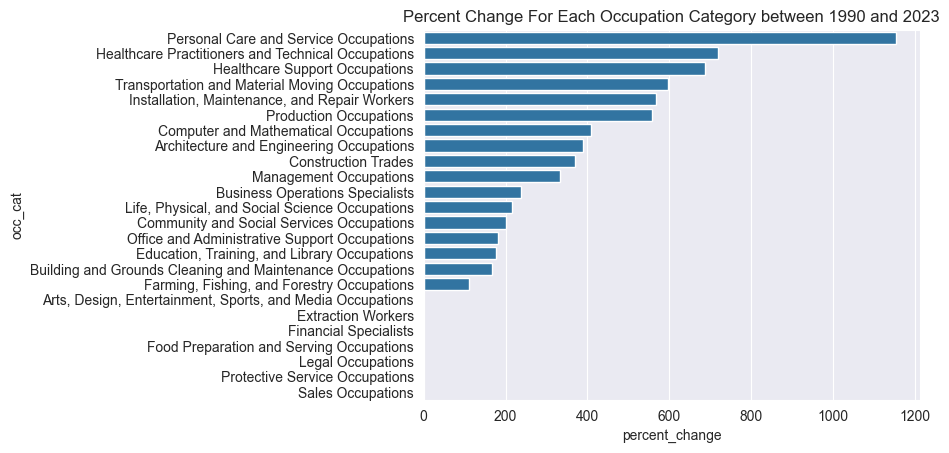

In [89]:
sns.barplot(data=income_occ_cat_pivoted,y='occ_cat',x='percent_change')
plt.title('Percent Change For Each Occupation Category between 1990 and 2023')
plt.show()

### What occupation categories are above the average income in California at that time.
**Find the average income for all jobs for each year**

In [220]:
average_income_per_year=census_data_w_occ.groupby('year')['inctot'].mean().reset_index()
average_income_per_year.rename(columns={'inctot':'avg_income'},inplace=True)
average_income_per_year

,year,avg_income
0,1990,20689.781981
1,2000,31691.440119
2,2006,33152.821484
3,2011,31123.735706
4,2016,38835.780427
5,2021,47700.598159
6,2023,53905.154587


**Find the average income for each occupation category for each year**

In [227]:
income_for_each_occ_cat=census_data_w_occ.groupby(['year','occ_cat'])['inctot'].mean().reset_index()
income_for_each_occ_cat

,year,occ_cat,inctot
0,1990,Architecture and Engineering Occupations,25484.643489
1,1990,"Arts, Design, Entertainment, Sports, and Media...",11197.997620
2,1990,Building and Grounds Cleaning and Maintenance ...,33047.692500
3,1990,Business Operations Specialists,42723.334056
4,1990,Community and Social Services Occupations,26719.409786
...,...,...,...
138,2023,N/A,27043.584283
139,2023,Office and Administrative Support Occupations,74270.824903
140,2023,Personal Care and Service Occupations,137523.705523
141,2023,Production Occupations,126230.799805


**Merge the two average income dataframes** 

In [228]:
occ_cat_above_average_inc=income_for_each_occ_cat.merge(average_income_per_year)

**Filter the new dataframe to include only the occupation categories whose average income is higher than the overall average income for that year.**

In [229]:
occ_cat_above_average_inc=occ_cat_above_average_inc[occ_cat_above_average_inc['inctot']>occ_cat_above_average_inc['avg_income']]
occ_cat_above_average_inc

,year,occ_cat,inctot,avg_income
0,1990,Architecture and Engineering Occupations,25484.643489,20689.781981
2,1990,Building and Grounds Cleaning and Maintenance ...,33047.692500,20689.781981
3,1990,Business Operations Specialists,42723.334056,20689.781981
4,1990,Community and Social Services Occupations,26719.409786,20689.781981
5,1990,Computer and Mathematical Occupations,30073.303279,20689.781981
...,...,...,...,...
137,2023,Management Occupations,189999.008475,53905.154587
139,2023,Office and Administrative Support Occupations,74270.824903,53905.154587
140,2023,Personal Care and Service Occupations,137523.705523,53905.154587
141,2023,Production Occupations,126230.799805,53905.154587


**Create several bar plots displaying only occupation categories with average incomes above that years overall average income**

This clearly shows, especially in the earlier years, that white-collar jobs are above the average income and blue-collar jobs are below the average income in California. It also shows that certain occupation categories, in particular healthcare and personal and service occupations, have quickly grown to have their average income well over the overall average income. Also it shows that management occupations have consistently been one of the highest paying occupation categories on average. 

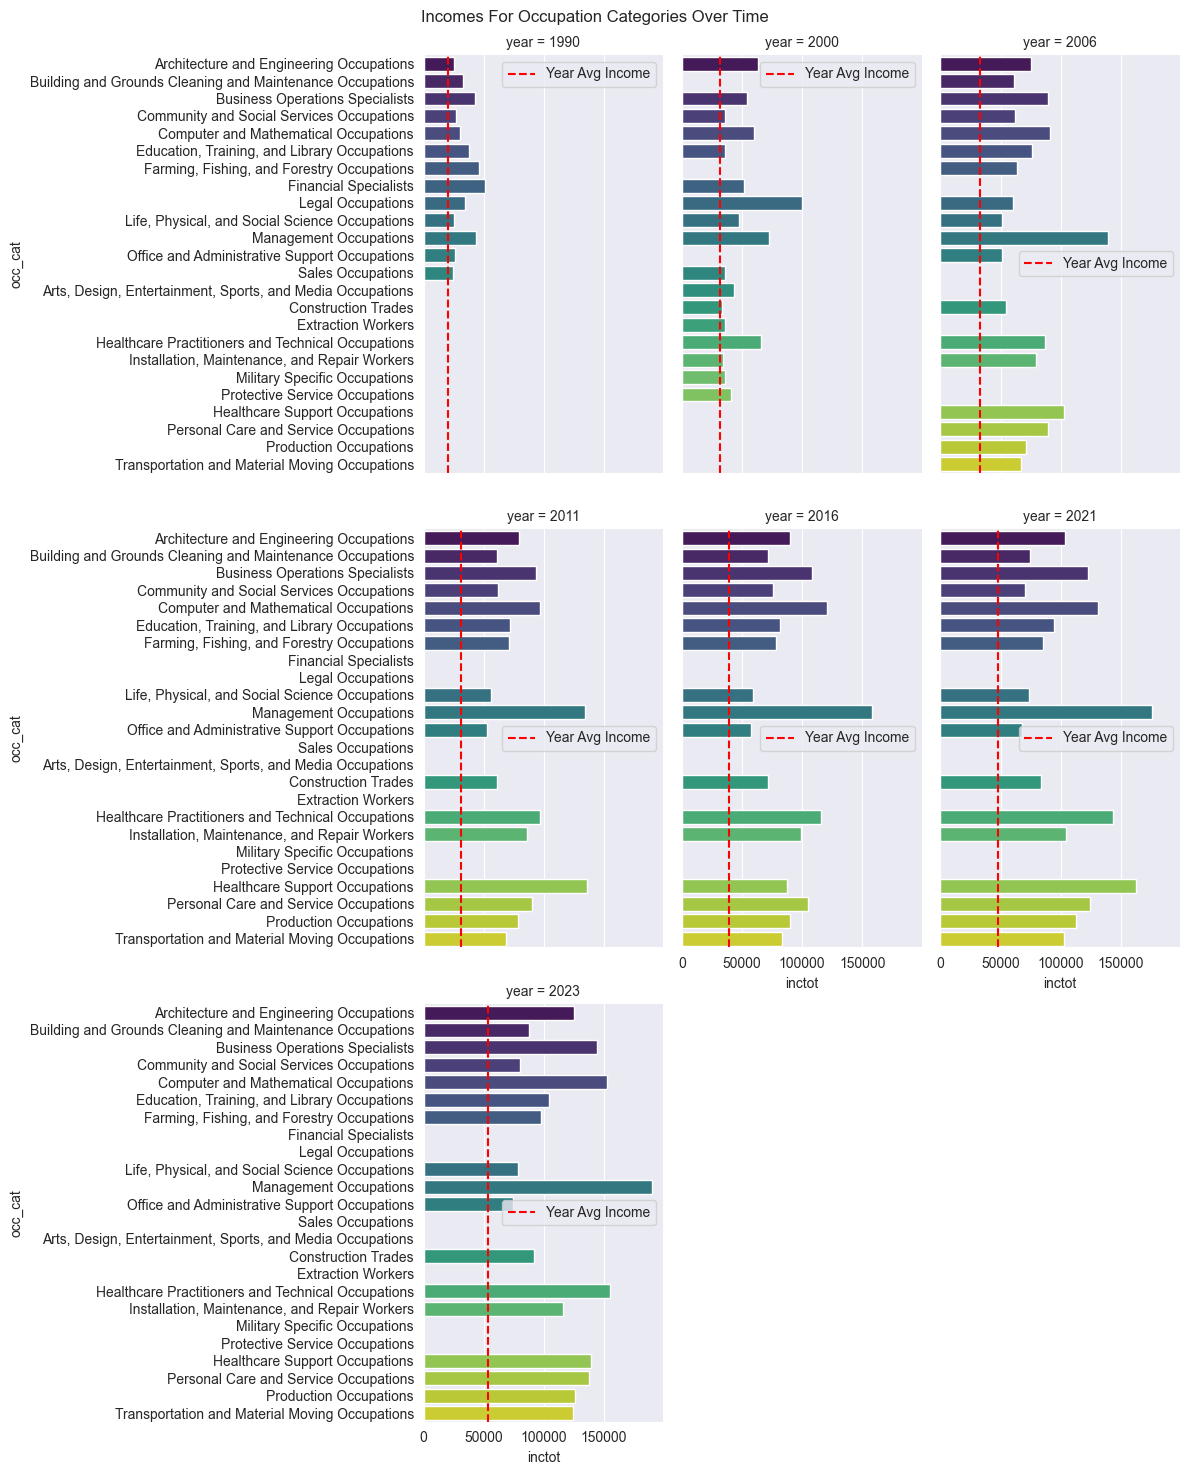

In [232]:
g = sns.catplot(data=occ_cat_above_average_inc, y='occ_cat', x='inctot', col='year', col_wrap=3, hue='occ_cat',
                kind='bar', height=5, aspect=0.8, palette='viridis',estimator=np.mean)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Incomes For Occupation Categories Over Time')
for ax, (year, subdata) in zip(g.axes.flat, occ_cat_above_average_inc.groupby('year')):
    avg_income = subdata['avg_income'].iloc[0]
    ax.axvline(avg_income, color='red', linestyle='--', label='Year Avg Income')
    ax.legend()

plt.show()

### Analyze the percent change in average income for each job type

**Create a dataframe showing the average total income for each occupation for each year which we can then use to find the percent change for each job type.**

In [210]:
income_for_each_job_type=census_data_w_occ.groupby(['year','job_type'])['inctot'].mean().reset_index()
income_for_each_job_type

,year,job_type,inctot
0,1990,Advertising and Promotions Managers,44620.478261
1,1990,Agricultural Engineers,73443.000000
2,1990,Air Traffic Controllers and Airfield Operation...,15064.479021
3,1990,Aircraft Mechanics and Service Technicians,32932.500000
4,1990,Aircraft Pilots and Flight Engineers,33737.830000
...,...,...,...
902,2023,Reinforcing Iron and Rebar Workers,77473.297297
903,2023,Sailors and Marine Oilers,87141.098901
904,2023,"Supervisors, Transportation and Material Movin...",104569.565217
905,2023,Upholsterers,153421.220930


**Filter this to find the percent change between our chosen range (2000 and 2023)**

Although the oldest year in our dataset is 1990, when you use 1990 you get signficantly more null values than if you use 2000 so for this visulization and analysis we used 2000 as our earliest year. 

In [243]:

income_for_each_job_type_chosen_years=income_for_each_job_type[(income_for_each_job_type['year']==2000) | (income_for_each_job_type['year']==2023)]



**Pivot the filtered dataframe to make it easier to find the percent change between these years.**

In [254]:
income_job_type_pivoted = income_for_each_job_type_chosen_years.pivot(index='job_type', columns='year', values='inctot').reset_index()
income_job_type_pivoted.columns.name = None
income_job_type_pivoted

,job_type,2000,2023
0,Accountants and Auditors,43759.542424,NaN
1,Actors,36773.366667,NaN
2,Actuaries,95900.000000,140591.562817
3,Administrative Services Managers,50302.777778,235585.142857
4,Advertising Sales Agents,52973.913043,NaN
...,...,...,...
457,"Welding, Soldering, and Brazing Workers",29066.567164,NaN
458,"Wholesale and Retail Buyers, Except Farm Products",38430.677966,161329.690722
459,"Woodworking Machine Setters, Operators, and Te...",17015.000000,NaN
460,Word Processors and Typists,20834.149425,NaN


**Calculates the percent change and add it as a column to the pivoted dataframe.**

In [255]:
income_job_type_pivoted['percent_change']=((income_job_type_pivoted[2023]-income_job_type_pivoted[2000])/income_job_type_pivoted[2000])*100
income_job_type_pivoted.head()

,job_type,2000,2023,percent_change
0,Accountants and Auditors,43759.542424,NaN,NaN
1,Actors,36773.366667,NaN,NaN
2,Actuaries,95900.000000,140591.562817,46.602255
3,Administrative Services Managers,50302.777778,235585.142857,368.334262
4,Advertising Sales Agents,52973.913043,NaN,NaN


**Clean the pivoted dataframe by sorting the values and dropping any rows where the percent change calculation didn't work because an income value was missing in one or more of the years.**

In [256]:
income_job_type_pivoted=income_job_type_pivoted.sort_values('percent_change',ascending=False)
income_job_type_pivoted=income_job_type_pivoted.dropna(subset='percent_change')
income_job_type_pivoted.head()

,job_type,2000,2023,percent_change
43,Brokerage Clerks,4800.000000,49904.970238,939.686880
305,"Nursing, Psychiatric, and Home Health Aides",17040.004975,139316.883117,717.587104
214,Industrial Truck and Tractor Operators,19978.732394,156380.084034,682.732763
450,Upholsterers,21888.000000,153421.220930,600.937596
208,"Hotel, Motel, and Resort Desk Clerks",12338.666667,80272.072893,550.573316


**Create a bar plot displaying the percent change in average income for each job type between 2000 and 2023**

Overall all the income percent changes were positive between these years. Based on the job types shown below it appears that blue collar had a higher percent icnrease than white collar jobs. 

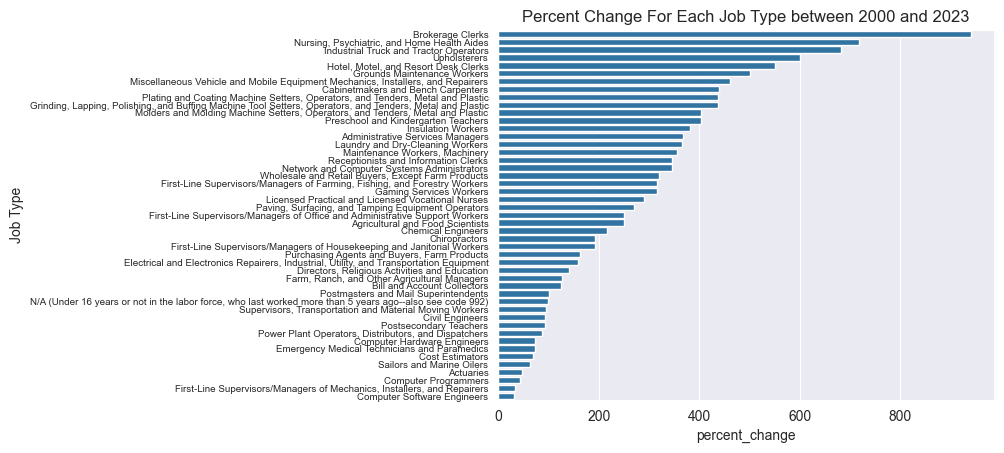

In [214]:
j=sns.barplot(data=income_job_type_pivoted,y='job_type',x='percent_change')
j.set_ylabel('Job Type',fontsize=10)
j.tick_params(axis='y', labelsize=7) 
plt.title('Percent Change For Each Job Type between 2000 and 2023')
plt.show()

### Find which specific jobs were above and below the overall average percent change in income between these years. 

**This calculates the general percent income increase for all jobs (including the N/A values) between these years**

In [215]:
census_data_w_occ_t=census_data_w_occ.groupby(['year'])['inctot'].mean().reset_index()
census_data_w_occ_t
average_income_total_2000=census_data_w_occ_t[census_data_w_occ_t['year']==2000]['inctot'].iloc[0]
average_income_total_2023=census_data_w_occ_t[census_data_w_occ_t['year']==2023]['inctot'].iloc[0]
income_percent_change=(average_income_total_2023-average_income_total_2000)/(average_income_total_2000)*100
float(income_percent_change)

70.09373630806544

**Filter the above visulization to include jobs that had a higher percent increase than the overall average percent income increase over this time** 

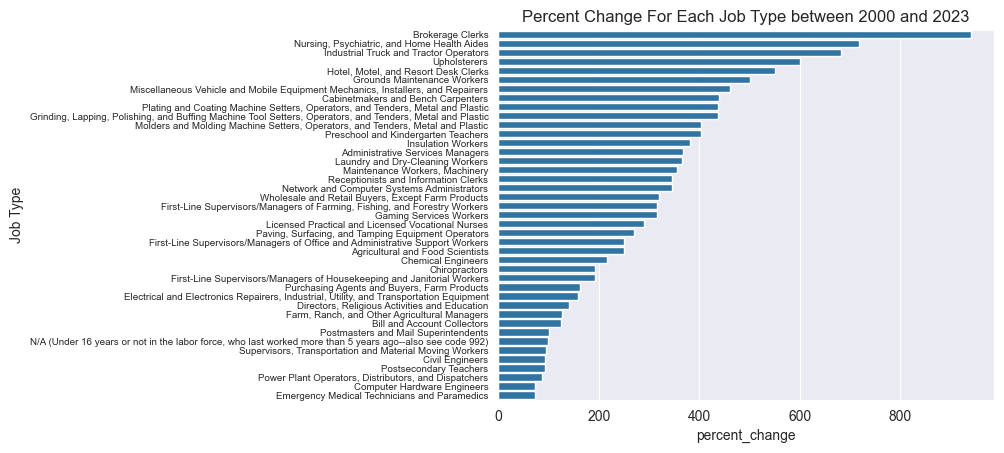

In [216]:
filtered_income_job_type=income_job_type_pivoted[income_job_type_pivoted['percent_change']>income_percent_change]
j=sns.barplot(data=filtered_income_job_type,y='job_type',x='percent_change')
j.set_ylabel('Job Type',fontsize=10)
j.tick_params(axis='y', labelsize=7) 
plt.title('Percent Change For Each Job Type between 2000 and 2023')
plt.show()

**Compare the lengths of original visualization and the new visulization to see how many jobs were below this threshold.**

In [259]:
len(income_job_type_pivoted)-len(filtered_income_job_type)

6

**What jobs were below the average percent increase threshold.**

In [258]:
below_thereshold = pd.concat([income_job_type_pivoted, filtered_income_job_type]).drop_duplicates(keep=False)
below_thereshold['job_type'].tolist()

['Cost Estimators',
 'Sailors and Marine Oilers',
 'Actuaries',
 'Computer Programmers',
 'First-Line Supervisors/Managers of Mechanics, Installers, and Repairers',
 'Computer Software Engineers']

## **Summary:**

To better understand California's rising cost of living, we analyzed U.S. Census data (specifically, the 1% Metro Samply Survey and ACS 1-year survey) to see if there were any clear trends between cost of living, income distribution, and demographics in California since the 1990's. The methodology we used to carry out this analysis included descriptive statistics, data visualization, identification of relationships and patterns, and transforming or creating features for further analysis. 

### Interesting Insights:

#### Median Income:
- Even though median income has been steadily rising (nearly tripling between 1990 and 2023), there was a small dip in median income in the years following the housing market crash before it began to rise again.
- There is evidence for increasing income disparity among Californians, with the highest earners incomes going up much faster than the middle and lowest earners. While this disparity has been occurring since 1990, it began to accelerate in 2011 after the housing market crash.
- Median incomes have risen the fastest for Asians and second fastest for Whites. Black, Native American, and Mixed/Other median incomes rose at roughly the same rate, but less than for Asians or Whites.
- At the county level, there was increasing median income variability between 1990 and 2023 between counties, with some counties median incomes increasing substantially faster than those of other counties.

#### Home Ownership:
- The proportion of homeowners to renters was steadily increasing up until 2006 (before the housing market crash) and then abruptly declined in 2011 (after the housing market crash) before starting to slowly rise again leading up to 2023.
- Median home value relative to one's income has risen from about 3 to 3.5 times the median income of a household in the 1990's and early 2000's to around 5 times one income in 2023. This was preceded by home value's reaching 6 times one's income in 2006 just prior to the housing market crash before dipping back down to 3.75 times one's income in 2011, before steadily starting to rise again.
- At the county level, median home values have shown increasing variability between 1990 and 2023 between counties, with some counties home values increasing much faster than those of other counties. This pattern is particularly pronounced after the housing market crash of 2007-2009.
- The average homeowner age in California has steadily risen from about 37 years old in 1990 to 45 years old in 2023.

#### Rental Costs:
- The average percentage of income that renters spend on rent has steadily risen between 1990 and 2023 from an average of 23% in 1990 to 26% in 2023, with average rent cost at an all time high of 30% of one's income on average in 2011 after the housing market crash.
- Average monthly rent has steadily risen from 1990 to 2023, more than tripling in that time frame from around \\$575/month in 1990 to \\$2000/month in 2023.
- At the county level, the average monthly rent cost shows increasing average monthly rent variability between 1990 and 2023 between counties, with some counties average monthly rent increasing much faster than other counties. 

#### Occupations:

- The visualizations confirm that in California between 1990 and 2023 white-collar jobs are much more likely to pay above the average income value and blue-collar jobs are more likely to pay below the average income value.
- The percent change in blue collar jobs have had a significantly higher income percent growth than white collar job between 2000 and 2023. This is logical and expected as blue collar jobs have lower wages so any percent growth would be more significant. This is why certain jobs like Computer Science and Engineering jobs have some of the lowest income percent growth changes during this time frame as they were already high paying jobs in our earlier census data years.
- Overall healthcare and personal care occupations have had the highest occupation income percent growth compared in California between 1990 and 2023.

### Analysis Limitations and Areas for Potential Improvement:

- The U.S. Census data had no clear way of tracking homelessness, which would also have been an interesting issue to explore with respect to California's rising cost of living.
- The sample size for the year 2000 (1-in-750 households) was different than for all the other surveys (1-in-100), but was the only next year available after 1990 that was of a comparable survey type for the analysis. Ideally, this survey would also have been taken with the same sample size as all the others.
- There was a 10-year gap between 1990 and the next available comparable survey in 2000. Ideally, we would have been able to look at survey data in at least 5 year increments starting in 1990.
- A larger overall sample size would have been ideal for all the surveys and was available at the ACS 5-year survey level (5-in-100 households), but we had concerns with computing power for processing those surveys as we ran into issues at the beginning of this analysis with the file size of the 1-year surveys.
- It would have been nice to look at rural areas in more depth, but we were limited due to the sample size. For instance, at this sample size, we were only able to look at counties with a population size of 65,000 or greater. 
- Hispanic/Latino was not added as a race/ethnic category until 2020, which would have been an interesting variable to look at since that population is prominent in California.